<div style="background-color: Lightgreen; padding: 10px; border-radius: 5px;"> 
    
## <span style="color: Red; "> Big Picture of the Project: </span>
### <span style="color: Navy;"> Suppose you take part in a meeting to evaluate campaign marketing strategy in banking industry  </span>  
### <span style="color: Navy;"> Speaker represents the strategy and now is your turn to give suggestion   </span>
### <span style="color: Navy; ">  You can suggest this: Oh, let see what AI says </span>
####
### <span style="color: blue; "> Here is the answer of AIML for your suggestion, please follow it. You will find some good ideas.  </span> 

### <span style="color: blue; "> This code has user friendly structure. It is classification issue in machine learning and designed by UC Berkeley, from Berkeley Engineering and Berkeley HAAS  and written by </span>  <span style="color: red; "> Reza Zamani
####
### <span style="color: Orange; "> We will go step by steps (in 11 problems). Generally, these steps can be seen in five sections:

### <span style="color: Red; "> 1- Data (features and target) understanding: <span style="color: blue; "> From problem 1 to problem 3 </span>
### <span style="color: Red; "> 2- Business understanding: <span style="color: blue; "> problem 4</span> 
### <span style="color: Red; "> 3- Baseline and simple Models (to get general clue): <span style="color: blue; "> from problem 5 to problem 9</span> 
###  <span style="color: Red; "> 4- Other models and model comparison (evaluation, choosing the best model): <span style="color: blue; "> problem 10 and 11  </span> 
###  <span style="color: Red; ">5- Results of analyzing the campaign marketing strategy: <span style="color: blue; "> last part of problem 11  </span> 
   
</div>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

<span style="color: red; ">  Answer: The dataset has  **17 campaigns** </span> 

<span style="color: red; ">  More explain: </span> That occurred between May 2008 and November 2010 in Portugal. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored and if there was a success (the target variable). 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [59]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
import graphviz

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

In [60]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [61]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21089,32,unknown,married,basic.9y,no,no,no,cellular,aug,thu,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
10697,32,self-employed,married,basic.9y,no,yes,yes,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
17024,53,self-employed,married,university.degree,no,no,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
33953,39,technician,single,professional.course,no,no,no,cellular,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
27897,28,admin.,single,university.degree,no,no,no,cellular,mar,wed,...,2,999,0,nonexistent,-1.8,92.843,-50.0,1.548,5099.1,yes
1841,40,technician,married,university.degree,no,no,no,telephone,may,fri,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
10767,56,admin.,married,unknown,no,yes,no,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
6281,29,technician,married,professional.course,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
30622,37,technician,single,professional.course,no,yes,no,cellular,may,mon,...,4,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
31135,31,blue-collar,single,high.school,no,no,no,cellular,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,no


### Problem 3: Understanding the Features

Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

<span style="color: red; ">  ***Input variables:*** </span>  

<span style="color: red; ">  **Bank client data:** </span>  

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

<span style="color: red; ">  **Related with the last contact of the current campaign:** </span>  


8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

<span style="color: red; ">  **Other attributes:** </span>  

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

<span style="color: red; ">  **Social and economic context attributes** </span>  

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

<span style="color: red; "> **Output variable (desired target):** </span>  


21. y - has the client subscribed a term deposit? (binary: 'yes','no')



### <span style="color: orange; "> **3-1: General check of data, info, missing and duplicate** </span>  


#### <span style="color: red; "> **Ceck data shape and info** </span>  


In [62]:
df.shape

(41188, 21)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
 <span style="color: blue; "> Point: Data has 21 columns, 1 target, 20 featuers, and 41176 rows </span>  
</div>


#### <span style="color: red; "> **Rename some columns to follow easily** </span>  


In [64]:
# some featueres name have '.', let change '.' to '_'
# moreover, some columns are hard to follow, let change their name 

# rename "emp.var.rate" to emp_var"
# rename "cons.price.idx" to 'cpi", Known in economics as CPI 
# rename "cons.conf.idx" to "conf", which show confidence of consumer
# rename "nr.employed" to _nr_emp" 
#rename "y" to target

df = df.rename(columns = {
    'emp.var.rate':'emp_var', 'cons.price.idx':'cpi', 
    'cons.conf.idx':'conf', 'nr.employed':'nr_emp',
    'y':'target'
})

In [65]:
df.columns 

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var', 'cpi', 'conf', 'euribor3m', 'nr_emp',
       'target'],
      dtype='object')

#### <span style="color: red; "> **Missing Values analysis** </span>  


In [66]:
df.isnull().sum() 

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
emp_var        0
cpi            0
conf           0
euribor3m      0
nr_emp         0
target         0
dtype: int64

#### <span style="color: red; "> **Check duplicate** </span>  


In [67]:
df.duplicated().sum()

12

In [68]:
# we have 12 duplicated data, we should remove them 

In [69]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [509]:
# Now we do not have duplicated data and missing value,
# But we should see all features, maybe there are some clue in the data 

### <span style="color: red; "> **Exploratory Data Analysis (EDA)** </span>  


### <span style="color: orange; "> **3-2: Target variable Analysis** </span>  


In [510]:
df.target.value_counts()

target
no     36537
yes     4639
Name: count, dtype: int64

In [511]:
df.target.value_counts(normalize=True).round (2)

target
no     0.89
yes    0.11
Name: proportion, dtype: float64

<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
 
#### <span style="color: blue; "> Points for target variable: </span> 
#### 1. target value is Imbalance. Then in splitig the data into train and test datasets
#### 2. Successful rate of campgain marketing is 11 percent. This shows that, in general, if you call ten person, you can get one contract and other 9 person reject suggestion of the campaing</span> 

</div>


### <span style="color: orange; "> **3-3: Numerical Variables Analysis** </span>  


# <span style="color: red; ">  3-3-1- Numerical variables summary Statistics </span>  

In [512]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int','float']).columns.tolist()
print(numerical_cols)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var', 'cpi', 'conf', 'euribor3m', 'nr_emp']


In [513]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var,cpi,conf,euribor3m,nr_emp
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
 
#### <span style="color: blue; "> Points for numerical features from summary statistics </span> 

1. <span style="color: blue; "> age: </span>  
    they call person from 17 to 98 years of old. 75% of people < 47 years,  focus was [32-47] years of old. 
2.  <span style="color: blue; "> duration: </span>  min is 0, which shows you call and can not reach or person will delete it immediately. maximum duration is 4918 second (82 min)
3. <span style="color: blue; "> campaign: </span> 
    it shows umber of contacts, average is 2.56, seems reasonable. maximum is 56, which is odd, we should take care about it.
   75% is 3 seams       reasonable.
4. <span style="color: blue; "> pdays: </span>  
    you see that, 25%, 50%, 75%, and max are the same (999).
    Here is a trick. as it has been metioned in input variable, at the begining of problem 3, 
    999 means client was not previously contacted. We should take care about it. it has been change the structure of pdays. 
5. <span style="color: blue; "> previous: </span>   seems good
6. <span style="color: blue; "> previousemp_var: </span> seems good. variation in employment is normal.
7.  <span style="color: blue; "> cpi: </span>
        cpi is consumer price index, one year set as base year and gets 100. 
        cpi smaller than 100 means years and months are before base year. it seems good. 
8. <span style="color: blue; "> conf: </span>   : seems good 
9. <span style="color: blue; "> euribor3m: </span>  
    this is is intereste rate, when you want to get loan from bank or deposit your meoney, this index affect your decision.
    Minimum is lower than 1 percent, maximum is 5 percent. it seems normal. 
10. <span style="color: blue; "> nr_emp: </span>   
    it is number of employment, data seems good and reasonable

</div>
   

In [514]:
#let focus on numerical features one by one

### <span style="color: red; "> *3-3-2- Visulization of "age" feature* </span>  

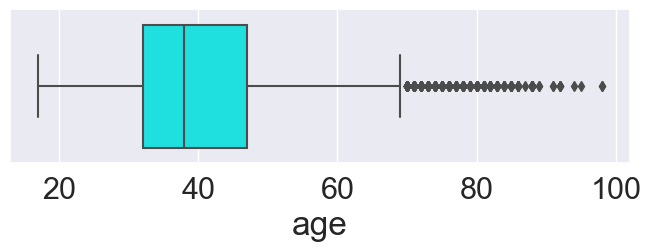

In [515]:
#box plot for age 
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='age',  color='cyan')
plt.show()

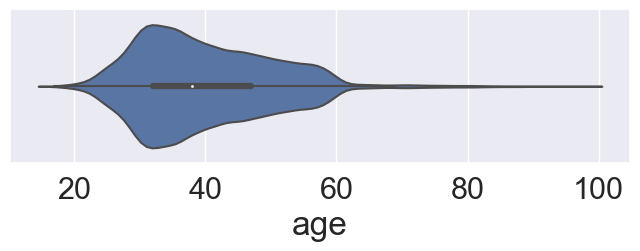

In [516]:
#violinplot for age
plt.figure(figsize=(8,2))
sns.violinplot(data=df, x='age')
plt.show()

C:\Users\soheia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


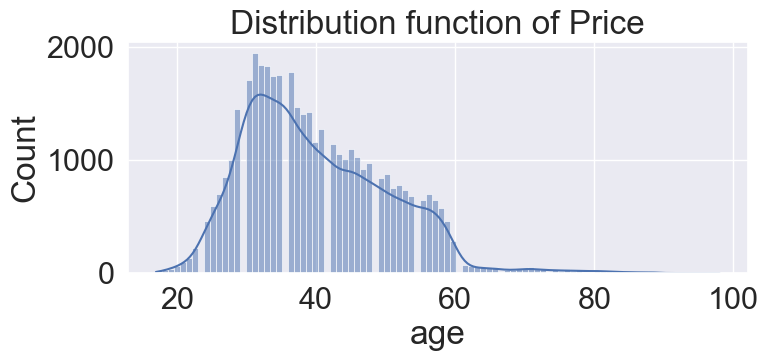

In [517]:
# histplot for age 
plt.figure(figsize=(8,3))
sns.histplot(df['age'], kde=True)
plt.title('Distribution function of Price')
plt.show();

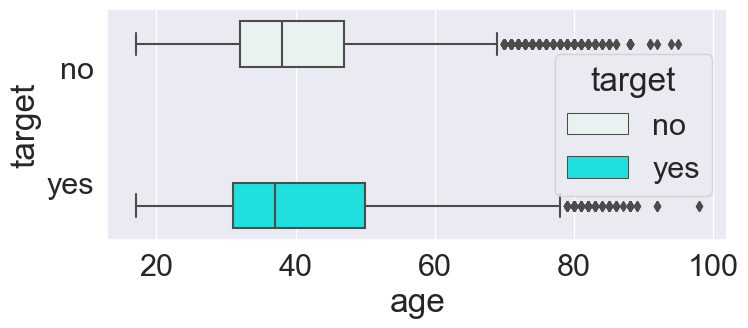

In [518]:
#box plot for age with attention to the target variable  
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(data=df, x='age', y='target', hue = 'target', color='cyan')
plt.show()

<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
 
#### <span style="color: blue; "> Points for age and its effect on target: </span> 
1. age from  <span style="color: red; "> 30 to 50 is golden age for marketing</span> 
2. age <span style="color: red; ">  20-30 and 50-60 are the second option </span>  for campaign marketing.
3. <span style="color: red; "> age > 70 is risky for marketing</span>


</div>


### <span style="color: red; "> *3-3-3- Visulization of "duration" feature* </span>  

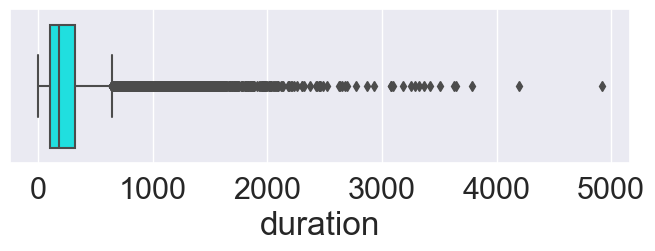

In [519]:
#boxplot
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='duration',  color='cyan')
plt.show()

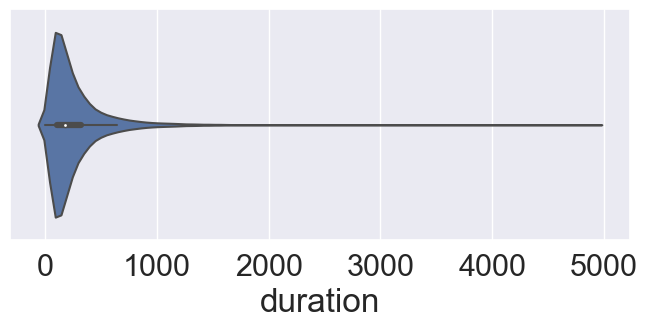

In [520]:
#violinplot
plt.figure(figsize=(8,3))
sns.violinplot(data=df, x='duration')
plt.show()

C:\Users\soheia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


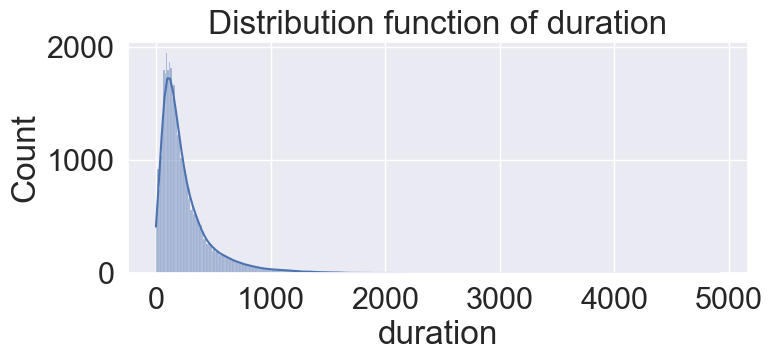

In [521]:
#hisplot 
plt.figure(figsize=(8,3))
sns.histplot(df['duration'], kde=True)
plt.title('Distribution function of duration')
plt.show();

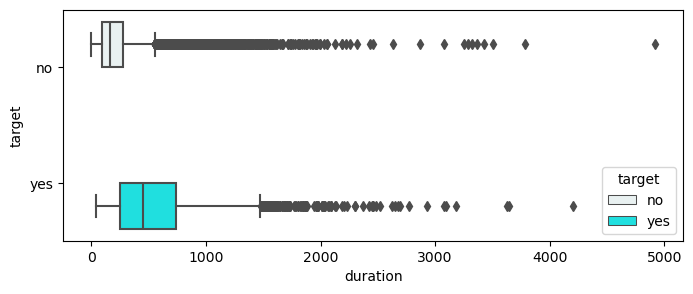

In [31]:
#the effect of feature on target variable   
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(data=df, x='duration', y='target', hue = 'target', color='cyan')
plt.show()

<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
 
#### <span style="color: blue; "> Points for "duration" feature and its effect on target: </span> 
1. durantion  meaurment is secod, I transmit in minute, as it would be easier to think about the time. 
2. <span style="color: red; "> best domain for "duration": 3-5 minutes  </span> 
3. at the begining,  <span style="color: red; "> duration goes up, probability of sucess (target feature) goes up too, </span>   which shows in campaing it is better to talk more and try to absorb the client. 
4. <span style="color: red; "> duration > 800: the probability of success decreases sharply.  </span> 


</div>


### <span style="color: red; "> *3-3- 4- Visulization of "campaign" feature* </span> 
Definition of campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

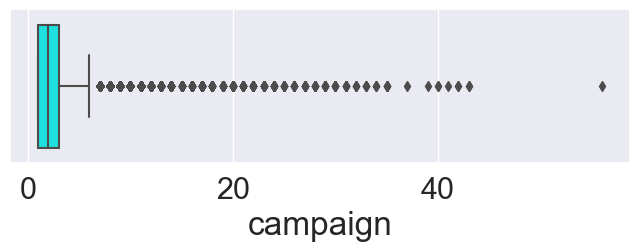

In [523]:
#boxplot
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='campaign',  color='cyan')
plt.show()

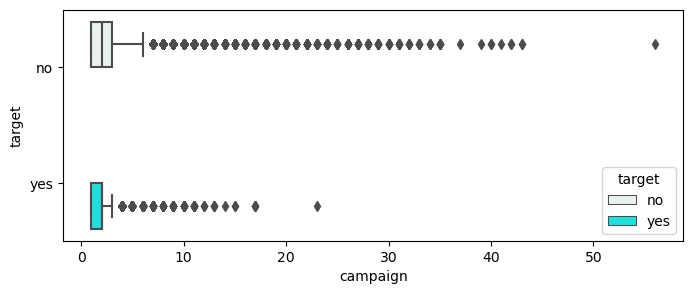

In [32]:
#the effect of feature on target variable   
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(data=df, x='campaign', y='target', hue = 'target', color='cyan')
plt.show()

<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
 
#### <span style="color: blue; "> Points for "campaign" feature and its effect on target: </span> 
1. <span style="color: red; ">  Best strategy: [1-3] times calling a person   </span>  
2. <span style="color: red; ">  campaign => 3, the probability of failure is higher than success  </span>     

</div>


### <span style="color: red; "> *3-3- 5- Visulization of "pdays" feature* </span> 
Definition of pdays pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

C:\Users\soheia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


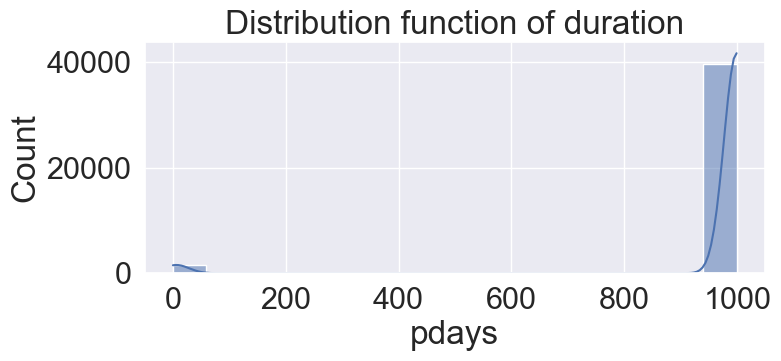

In [525]:
#hisplot 
plt.figure(figsize=(8,3))
sns.histplot(df['pdays'], kde=True)
plt.title('Distribution function of duration')
plt.show();

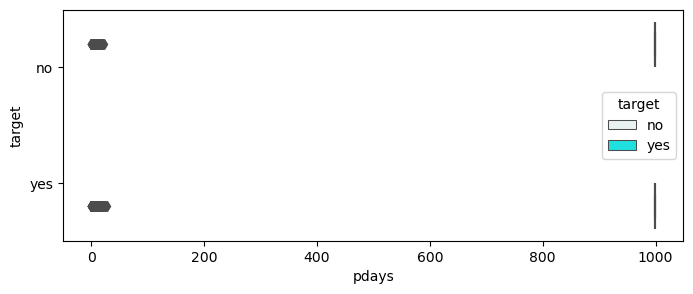

In [33]:
#the effect of feature on target variable   
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(data=df, x='pdays', y='target', hue = 'target', color='cyan')
plt.show()

### We know the number 999 is especial in this feature, then we remove here to analyse only better this feature to see what is happening 

In [35]:
df1=df [df.pdays < 999]

In [36]:
df1['pdays'].value_counts()

pdays
3     439
6     412
4     118
9      64
2      61
7      60
12     58
10     52
5      46
13     36
11     28
1      26
15     24
14     20
8      18
0      15
16     11
17      8
18      7
22      3
19      3
21      2
25      1
26      1
27      1
20      1
Name: count, dtype: int64

In [37]:
df1['pdays'].value_counts(normalize= True).round(2)

pdays
3     0.29
6     0.27
4     0.08
9     0.04
2     0.04
7     0.04
12    0.04
10    0.03
5     0.03
13    0.02
11    0.02
1     0.02
15    0.02
14    0.01
8     0.01
0     0.01
16    0.01
17    0.01
18    0.00
22    0.00
19    0.00
21    0.00
25    0.00
26    0.00
27    0.00
20    0.00
Name: proportion, dtype: float64

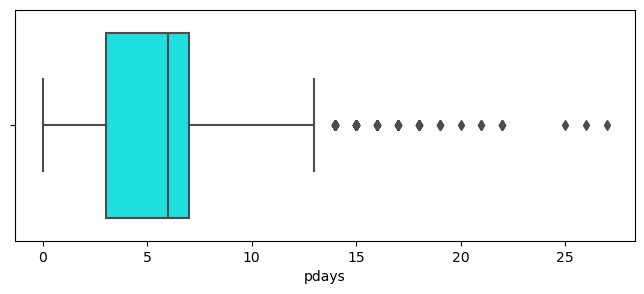

In [38]:
#boxplot
plt.figure(figsize=(8,3))
sns.boxplot(data=df1, x='pdays',  color='cyan')
plt.show()

C:\Users\soheia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


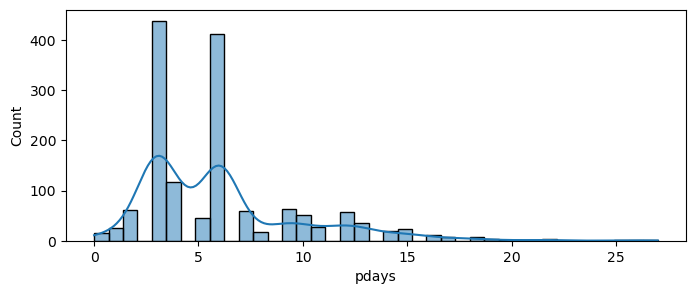

In [39]:
#hisplot 
plt.figure(figsize=(8,3))
sns.histplot(data = df1, x='pdays', kde=True)
plt.show();

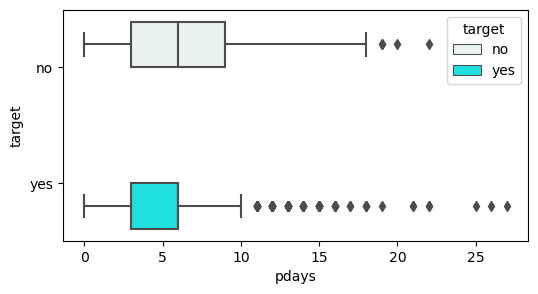

In [40]:
#the effect of feature on target variable   
fig, ax = plt.subplots(figsize=(6,3))
sns.boxplot(data=df1, x='pdays', y='target', hue = 'target', color='cyan')
plt.show()

 <div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
 
#### <span style="color: blue; "> Points for "pdays" feature and its effect on target: </span> 
1. <span style="color: red; ">  Golden days for next call to get a contract and absorb deposit from the clinet is  [3-6] days from  the last call.   </span>  
2.   <span style="color: red; ">  Exception to 999, dataset range is [0-27].  </span>  dataset suggested the number of 999 for client was not previously contacted. Our analysis show that when we remove 999, then maximum number will be 27. Then if you want to change 999 to another number you can do it, but this number can not be in the range [0-27].However, the number 999 is enough big that can get every body attetion to that. If you want to change 999 to othre number, It better it would more big enough to be understood as especial value in this feature. 
</div>


### <span style="color: red; "> *3-3- 6- Visulization of "previous" feature* </span> 

Definition of previous: number of contacts performed before this campaign and for this client (numeric)

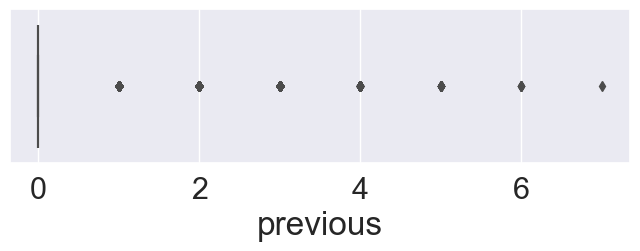

In [533]:
#boxplot
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='previous',  color='cyan')
plt.show()

In [534]:
# these boxplot seems odd, let change the strategy 

In [535]:
df['previous'].value_counts()

previous
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

In [536]:
df['previous'].value_counts(normalize=True).round(2)

previous
0    0.86
1    0.11
2    0.02
3    0.01
4    0.00
5    0.00
6    0.00
7    0.00
Name: proportion, dtype: float64

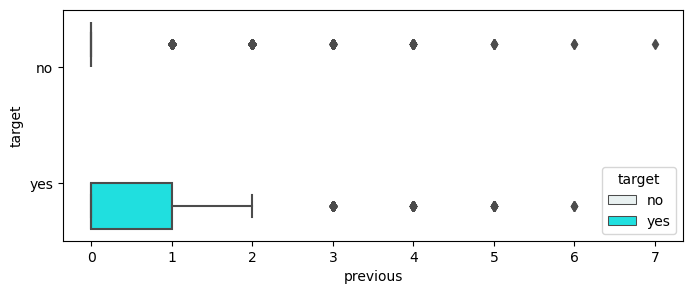

In [22]:
#the effect of feature on target variable   
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(data=df, x='previous', y='target', hue = 'target', color='cyan')
plt.show()

 <div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 

#### <span style="color: blue; "> Points for "previous" feature and its effect on target: </span> 
1. <span style="color: red; ">  Zero contact performed before this campaig: 86%  </span>
2.  <span style="color: red; ">  Zero or one contact performed before this campaig: 97%  </span>
3.   If number of previous are more than 2, it is very little probability to success and absorb resources to the bank 
</div>

### <span style="color: red; "> *3-3- 7- Visulization of "emp_var " feature* </span> 
Definition of "emp_var": employment variation rate - quarterly indicator (numeric)

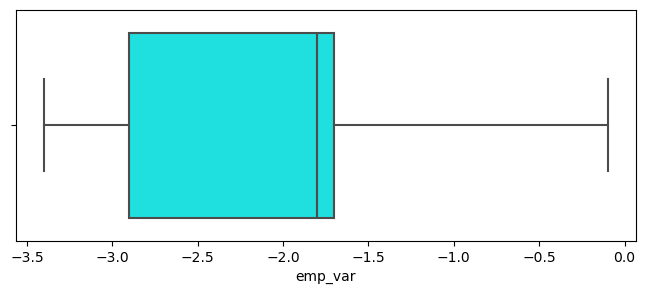

In [41]:
#boxplot
plt.figure(figsize=(8,3))
sns.boxplot(data=df1, x='emp_var',  color='cyan')
plt.show()

C:\Users\soheia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


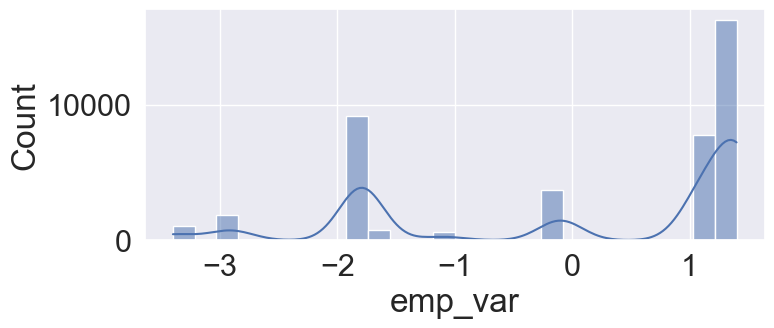

In [539]:
#hisplot 
plt.figure(figsize=(8,3))
sns.histplot(data = df, x='emp_var', kde=True)
plt.show();

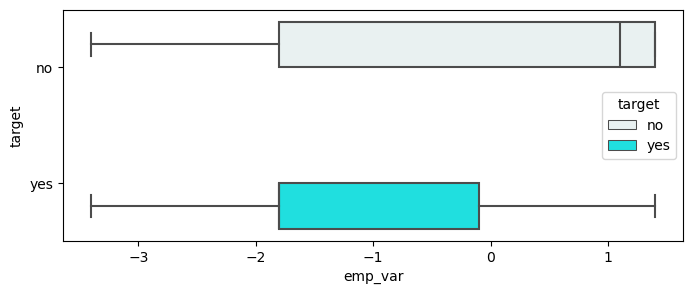

In [42]:
#the effect of feature on target variable   
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(data=df, x='emp_var', y='target', hue = 'target', color='cyan')
plt.show()

 <div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 

#### <span style="color: blue; "> Points for "emp_var" feature and its effect on target: </span> 
1. <span style="color: red; "> Recision in economy: </span> Most of data has negative vairation rate. This is completely true, 
as the time for the marketing campaing was for the rudation of 2008-2010. On that time, the world, including the Portugal, where the dataset created. 
2.  <span style="color: red; ">  Success in recession or in boom? : in Recession  (-2 < emp_var < 0). </span>  It shows when poeple think they maybe lose their job, they deposite more in bank which increase the success rate
3. <span style="color: red; ">   Failure in recession or in boom? answer: in both of them  </span>
 , but the proability of boos is higher 
</div>

In [541]:
#let follow this analysis with focus on the  number of employment (nr_emp) which is close to our last dication (emp_var) 

### <span style="color: red; "> *3-3- 8- Visulization of "nr_emp " feature* </span> 
Definition of "nr_emp": number of employees - quarterly indicator (numeric)

C:\Users\soheia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


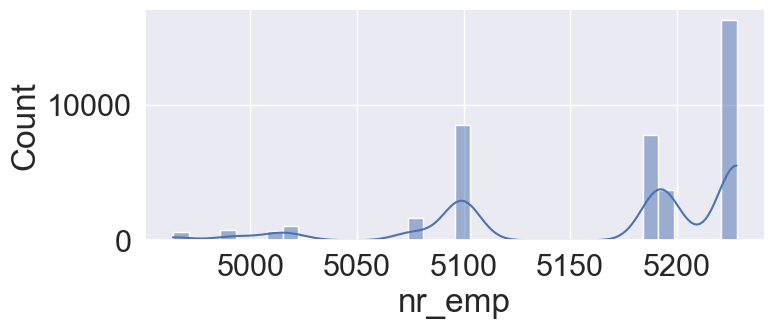

In [542]:
#hisplot 
plt.figure(figsize=(8,3))
sns.histplot(data = df, x='nr_emp', kde=True)
plt.show();

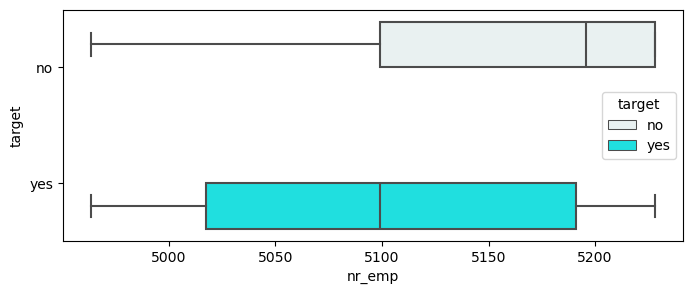

In [43]:
#the effect of feature on target variable   
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(data=df, x='nr_emp', y='target', hue = 'target', color='cyan')
plt.show()

In [544]:
# this last two plots are very similar to what we get for "mp-var"
# let see both of them together

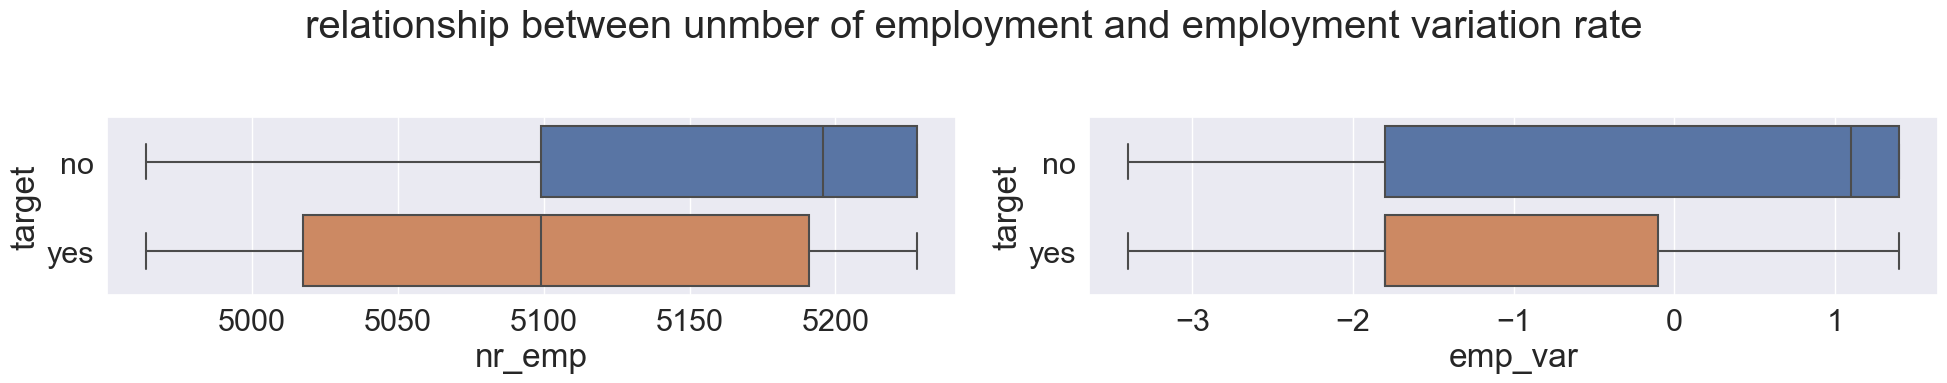

In [545]:
# this last two plots are very similar to what we get for "
# Box plots for numeric features
sns.set(font_scale = 2)

fig, ax = plt.subplots(1, 2, figsize=(20,4))
fig.suptitle('relationship between unmber of employment and employment variation rate', y=1.)


sns.boxplot(x=df['nr_emp'], y=df['target'], ax=ax[0])
sns.boxplot(x=df['emp_var'], y=df['target'], ax=ax[1])
fig.tight_layout()

 <div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 

#### <span style="color: blue; "> Points for "nr_emp" feature and its effect on target: </span> 
1. <span style="color: red; "> Normal condition:  </span> number of employee is 5200 
2. <span style="color: red; ">  Recision in economy: </span> When the number of employees are smaller than 5200, the porbability of achieving succes is more.
3. <span style="color: red; "> Correlation between two features (nr_emp, emp_var)  </span> between two features (nr_emp, emp_var) can be high and correlation between them ( in heat map) should check. 


</div>
              

### <span style="color: red; "> *3-3- 9- Visulization of "cpi " feature* </span> 
Definition of "cpi": consumer price index - monthly indicator (numeric)

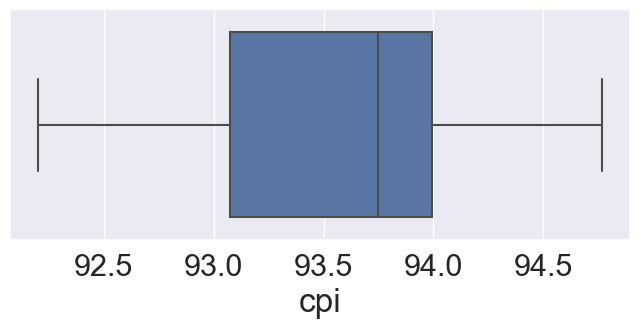

In [546]:
#violinplot
plt.figure(figsize=(8,3))
sns.boxplot(data=df, x='cpi')
plt.show()

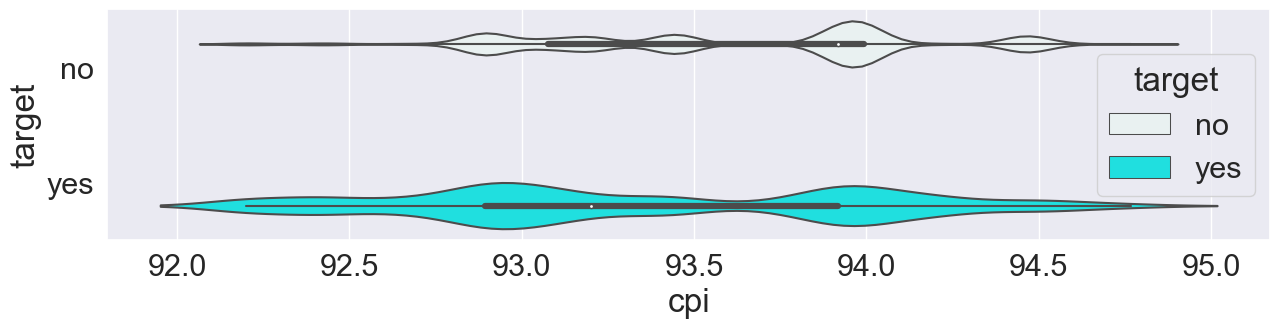

In [547]:
#the effect of feature on target variable   
fig, ax = plt.subplots(figsize=(15,3))
sns.violinplot(data=df, x='cpi', y='target', hue = 'target', color='cyan', fontsize = 8)
plt.show()

In [548]:
df.groupby('target')['cpi'].mean()

target
no     93.603798
yes    93.354577
Name: cpi, dtype: float64

 <div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 

#### <span style="color: blue; "> Points for "cpi" feature and its effect on target: </span> 
1. <span style="color: red; "> Cpi or Inflation?  </span> cpi is consumper price index (CPI).If we want to analyze the data we need to calculate inflation.
2.  <span style="color: red; "> Is that necessary to have this feature in this project?  </span> : cpi is very important index in economy, but for this project it should be chage to inflation or we can remove it as we have classification not regression ML

</div>
          

### <span style="color: red; "> *3-3- 10- Visulization of "conf " feature* </span> 
Definition of "conf": consumer confidence index - monthly indicator (numeric)

<span style="color: red; "> Extra information </span>  : the monthly Consumer Confidence Indicator with  <span style="color: red; "> range from -100 to 100 with neutral point 0. </span> range from -100 to 100 with neutral point 0.
The Consumer Confidence Survey® reflects prevailing business conditions and likely developments for the months ahead. 
This monthly report details consumer attitudes, buying intentions, vacation plans, and consumer expectations for inflation, stock prices, and interest rates.

C:\Users\soheia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


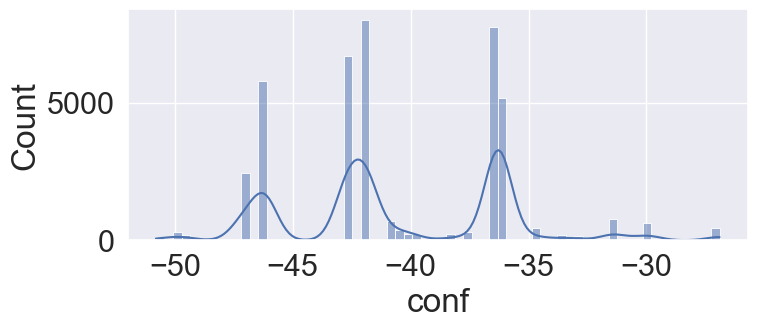

In [549]:
#hisplot 
plt.figure(figsize=(8,3))
sns.histplot(data = df, x='conf', kde=True)
plt.show();

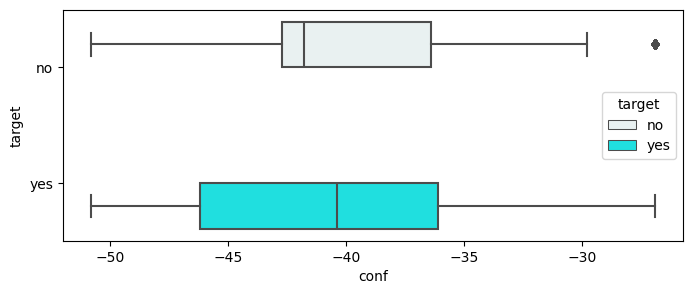

In [44]:
#the effect of feature on target variable   
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(data=df, x='conf', y='target', hue = 'target', color='cyan')
plt.show()

In [551]:
df.groupby ('target')['conf'].mean().round (2)

target
no    -40.59
yes   -39.79
Name: conf, dtype: float64

In [552]:
df.groupby ('target')['conf'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
no,36537.0,-40.593232,4.390759,-50.8,-42.7,-41.8,-36.4,-26.9
yes,4639.0,-39.791119,6.139657,-50.8,-46.2,-40.4,-36.1,-26.9


<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 

#### <span style="color: blue; "> Points for "conf" feature and its effect on target: </span> 
1. <span style="color: red; "> Bad business condition: </span> as both figures show,  <span style="color: red; "> conf < 0 </span>  which represents bad business condition on that time <span style="color: red; "> (2008-2010) in portugal </span>  
2. <span style="color: red; "> Is that necessary to have this feature in this project?  </span> both success and failure target have similar mean.
3. <span style="color: red; "> Correlation with other features: </span> as I mentioned in the definition of index, it covers consumer attitudes, buying intentions, vacation plans, and consumer expectations for inflation, stock prices, and interest rates.  <span style="color: red; "> Then we should check the correlation between "cof", "cpi", and "euribor3m".  </span> 

</div>
          

In [553]:
# last numerical feature is " 	euribor3m 	"

### <span style="color: red; "> *3-3- 11- Visulization of "euribor3m" feature* </span> 
Definition of "euribor3m": euribor 3 month rate - daily indicator (numeric)

<span style="color: red; "> Extra information </span>
The 3-month Euribor, or Euro Interbank Offered Rate, is the interest rate at which European banks lend to each other for a period of three months.
 It's a key benchmark rate in the European financial system. 

In [554]:
df.euribor3m. value_counts()

euribor3m
4.857    2868
4.962    2611
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: count, Length: 316, dtype: int64

In [555]:
df.euribor3m.min()

0.634

In [556]:
df.euribor3m.max()

5.045

In [557]:
int= df.euribor3m. value_counts()
int [int >1000]

euribor3m
4.857    2868
4.962    2611
4.963    2487
4.961    1902
4.856    1210
4.964    1175
1.405    1169
4.965    1070
4.864    1044
4.960    1013
Name: count, dtype: int64

In [558]:
int= df.euribor3m. value_counts()
int [int >500]

euribor3m
4.857    2868
4.962    2611
4.963    2487
4.961    1902
4.856    1210
4.964    1175
1.405    1169
4.965    1070
4.864    1044
4.960    1013
4.968     991
4.959     895
4.860     892
4.855     839
4.076     822
1.266     820
4.859     788
4.120     756
4.858     733
4.153     689
4.021     676
4.967     643
1.281     637
4.966     620
4.191     610
1.250     587
4.958     581
1.291     544
1.327     538
4.957     537
1.299     520
Name: count, dtype: int64

C:\Users\soheia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


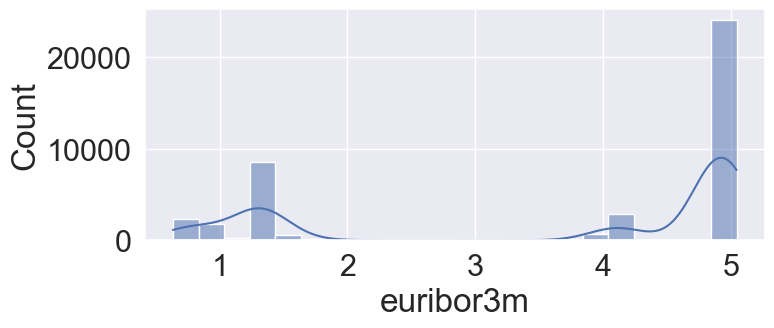

In [559]:
#hisplot 
plt.figure(figsize=(8,3))
sns.histplot(data = df, x='euribor3m', kde=True)
plt.show();

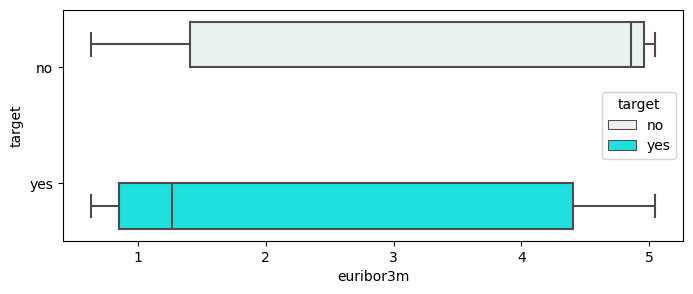

In [45]:
#the effect of feature on target variable   
fig, ax = plt.subplots(figsize=(8,3))
sns.boxplot(data=df, x='euribor3m', y='target', hue = 'target', color='cyan')
plt.show()

In [561]:
df.groupby ('target')['euribor3m'].mean()

target
no     3.811482
yes    2.123362
Name: euribor3m, dtype: float64

In [562]:
df.groupby ('target')['euribor3m'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
no,36537.0,3.811482,1.638179,0.634,1.405,4.857,4.962,5.045
yes,4639.0,2.123362,1.742717,0.634,0.849,1.266,4.406,5.045


<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 

#### <span style="color: blue; "> Points for "euribor3m" feature and its effect on target: </span> 
1. <span style="color: red; "> Success compaign is in lower interest rate </span> interest rate fluctuates between 0.6 % to 5%. 
accept or reject of campaing marketing is sensitive to interest rate. 

</div>
          

In [563]:
# a big pitcure of all numericla dat in histogram

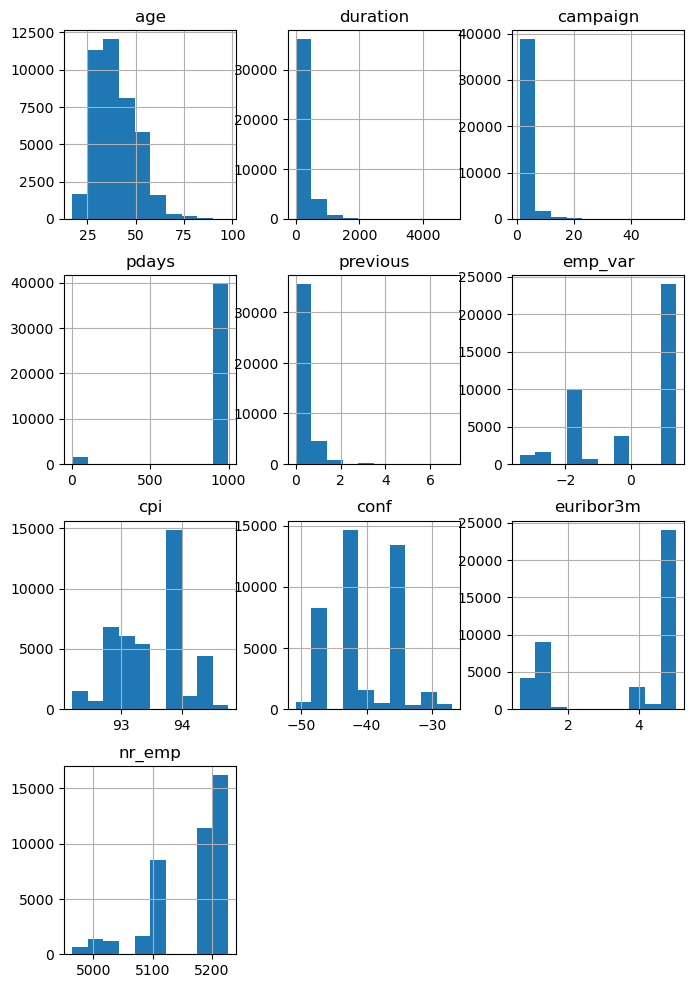

In [46]:
df.hist(figsize = (8, 12))
plt.show()

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41176 non-null  int64  
 1   job          41176 non-null  object 
 2   marital      41176 non-null  object 
 3   education    41176 non-null  object 
 4   default      41176 non-null  object 
 5   housing      41176 non-null  object 
 6   loan         41176 non-null  object 
 7   contact      41176 non-null  object 
 8   month        41176 non-null  object 
 9   day_of_week  41176 non-null  object 
 10  duration     41176 non-null  int64  
 11  campaign     41176 non-null  int64  
 12  pdays        41176 non-null  int64  
 13  previous     41176 non-null  int64  
 14  poutcome     41176 non-null  object 
 15  emp_var      41176 non-null  float64
 16  cpi          41176 non-null  float64
 17  conf         41176 non-null  float64
 18  euribor3m    41176 non-null  float64
 19  nr_emp   

### <span style="color: red; "> 3-4- Correlation between Numerical variables  </span>  

In [49]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int','float']).columns.tolist()
print(numerical_cols)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var', 'cpi', 'conf', 'euribor3m', 'nr_emp']


In [50]:
#heatmap for the data frame
df_num= df[numerical_cols]
corr = df_num.corr()
corr

,age,duration,campaign,pdays,previous,emp_var,cpi,conf,euribor3m,nr_emp
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp_var,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cpi,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
conf,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr_emp,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<Axes: >

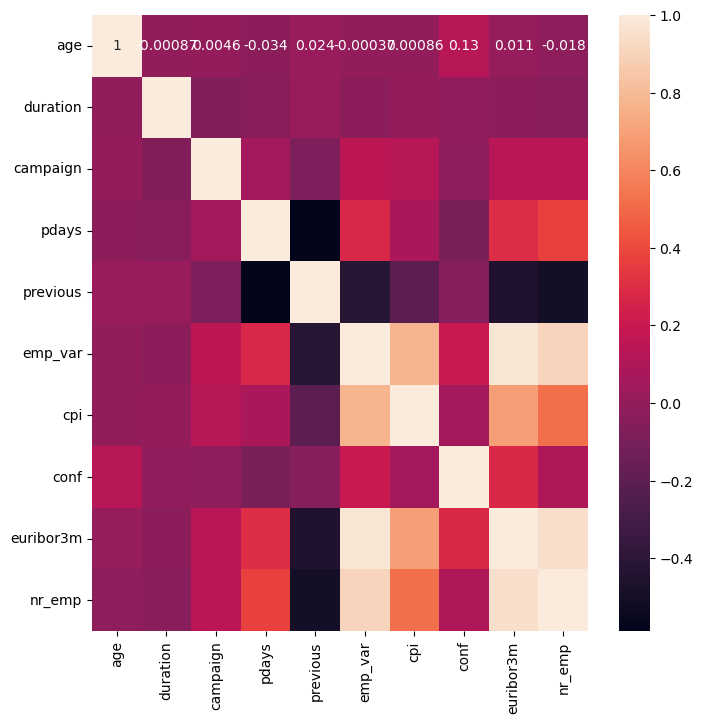

In [51]:
#heatmap for the data frame
plt.subplots(figsize = (8,8))
sns.heatmap(df_num.corr(),annot=True)

In [569]:
corr> 0.7
# nr_emp with emp_var, euribor3m
# emp_vare with nr_emp, euribor3m, cpi
# cpi with emp_var 
# euribor3m with emp_var, nr_emp 
# finidng for multicolinearity : 
#    1- multicolinearity with 3 features:  emp_vare
#    2- multicolinearity with 2 feature: nr_emp , euribor3m
 #   3- multicolinearity with 1 feature: cpi
    

,age,duration,campaign,pdays,previous,emp_var,cpi,conf,euribor3m,nr_emp
age,True,False,False,False,False,False,False,False,False,False
duration,False,True,False,False,False,False,False,False,False,False
campaign,False,False,True,False,False,False,False,False,False,False
pdays,False,False,False,True,False,False,False,False,False,False
previous,False,False,False,False,True,False,False,False,False,False
emp_var,False,False,False,False,False,True,True,False,True,True
cpi,False,False,False,False,False,True,True,False,False,False
conf,False,False,False,False,False,False,False,True,False,False
euribor3m,False,False,False,False,False,True,False,False,True,True
nr_emp,False,False,False,False,False,True,False,False,True,True


In [570]:
corr > 0.5
# cpi,, emp_var, nr_emp, and euribor3m all together 

,age,duration,campaign,pdays,previous,emp_var,cpi,conf,euribor3m,nr_emp
age,True,False,False,False,False,False,False,False,False,False
duration,False,True,False,False,False,False,False,False,False,False
campaign,False,False,True,False,False,False,False,False,False,False
pdays,False,False,False,True,False,False,False,False,False,False
previous,False,False,False,False,True,False,False,False,False,False
emp_var,False,False,False,False,False,True,True,False,True,True
cpi,False,False,False,False,False,True,True,False,True,True
conf,False,False,False,False,False,False,False,True,False,False
euribor3m,False,False,False,False,False,True,True,False,True,True
nr_emp,False,False,False,False,False,True,True,False,True,True


In [571]:
corr>0.3
# cpi,, emp_var, nr_emp, and euribor3m all together 

,age,duration,campaign,pdays,previous,emp_var,cpi,conf,euribor3m,nr_emp
age,True,False,False,False,False,False,False,False,False,False
duration,False,True,False,False,False,False,False,False,False,False
campaign,False,False,True,False,False,False,False,False,False,False
pdays,False,False,False,True,False,False,False,False,False,True
previous,False,False,False,False,True,False,False,False,False,False
emp_var,False,False,False,False,False,True,True,False,True,True
cpi,False,False,False,False,False,True,True,False,True,True
conf,False,False,False,False,False,False,False,True,False,False
euribor3m,False,False,False,False,False,True,True,False,True,True
nr_emp,False,False,False,True,False,True,True,False,True,True


In [572]:
corr< -0.5
# high negative correlation ; (pdays, previous), (previous, nr_emp)

,age,duration,campaign,pdays,previous,emp_var,cpi,conf,euribor3m,nr_emp
age,False,False,False,False,False,False,False,False,False,False
duration,False,False,False,False,False,False,False,False,False,False
campaign,False,False,False,False,False,False,False,False,False,False
pdays,False,False,False,False,True,False,False,False,False,False
previous,False,False,False,True,False,False,False,False,False,True
emp_var,False,False,False,False,False,False,False,False,False,False
cpi,False,False,False,False,False,False,False,False,False,False
conf,False,False,False,False,False,False,False,False,False,False
euribor3m,False,False,False,False,False,False,False,False,False,False
nr_emp,False,False,False,False,True,False,False,False,False,False


<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 

#### <span style="color: blue; "> Points for correlation between features : </span> 
1. <span style="color: red; "> High multicolinearity (corr > 0.7 ):: </span>  <span style=" color: blue; "> 4 features  </span> have high positive correlation with each other:
   <span style="color: red; "> cpi,, emp_var, nr_emp, and euribor3m </span>
2. <span style="color: red; ">  high level of multicolinearity : </span> 
###   1- multicolinearity with 3 features:  emp_var
###   2- multicolinearity with 2 features: nr_emp , euribor3m
###   3- multicolinearity with 1 feature: cpi
3.  <span style="color: red; "> Negative multicolinearity: </span>    <span style=" color: blue; "> 3 features  </span>  have high negative correlation.   <span style="color: red; "> feature "previous" with "pdays and "nr_emp" features </span>
4.  ### <span style="color: red; "> Desicion making:   </span>
In modeling we do not use feature with maximum number of high multicolinearity:  
## Do not use this feature in modeling: emp_var

</div>

### <span style="color: orange; "> **3-4: Categorical variable Analysis** </span>  


In [573]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'target']


### <span style="color: red; "> 3-4- 1- Statistic Summart fo Categorical variables </span>  

In [574]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,target
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
 
#### <span style="color: blue; "> Points for categorical features from summary statistics </span> 

1. <span style="color: blue; "> job: </span> it had 12 unique,  <span style="color: red; ">  "admin" </span> is dominant job character which covers around   <span style="color: red; ">  25% </span>   
2.  <span style="color: blue; "> marital: </span> 
    more than <span style="color: red; ">  60% </span>  of people are <span style="color: red; ">  "married" </span>
3. <span style="color: blue; "> education: </span> 
    <span style="color: red; ">  "university degree" </span> is more than <span style="color: red; ">  30% </span>  of targeted by 17 campaigns 
4. <span style="color: blue; "> defautl: </span>  <span style="color: red; ">  "around 80%" </span>  of people have  <span style="color: red; ">  not has credit </span>  in default. 
5. <span style="color: blue; "> housing: </span>   <span style="color: red; ">  most of 50% </span>    of people has housing loan 
6. <span style="color: blue; "> laon: </span>  more than <span style="color: red; ">  80% of people do not have personal loan </span>
7.  <span style="color: blue; "> contact: </span>  <span style="color: red; ">  62% of contancts was by cellula </span>   
8. <span style="color: blue; "> month: </span>  campaign was active for <span style="color: red; ">  10 months </span> , and <span style="color: red; ">   1/3 of last contacts belong to May </span> 
9. <span style="color: blue; "> day_of_week: </span>  5 days of week covered by campaigns and maximum day is 21% which shows there is <span style="color: red; ">  no difference between days  </span>  
10. <span style="color: blue; "> poutcome: 	 </span>  <span style="color: red; ">   around 86% </span>   of outcome of the previous marketing campaign belongs to  <span style="color: red; ">   'nonexistent' </span> ,
    wihch shows maybe people do not answer this question.

</div>

### <span style="color: red; "> 3-4-2- Number of Unique of  Categorical variables </span>  

In [575]:
for cat in categorical_cols:
    print ('number of each categroy in', cat)
    print ('\n', df[cat].value_counts())

number of each categroy in job

 job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
number of each categroy in marital

 marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64
number of each categroy in education

 education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64
number of each categroy in default

 default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64
number of each categroy in housing

 housing
yes        21571
no         18615
unknown   

### <span style="color: red; "> 3-4-3- Distribution of  Categorical variables </span>  

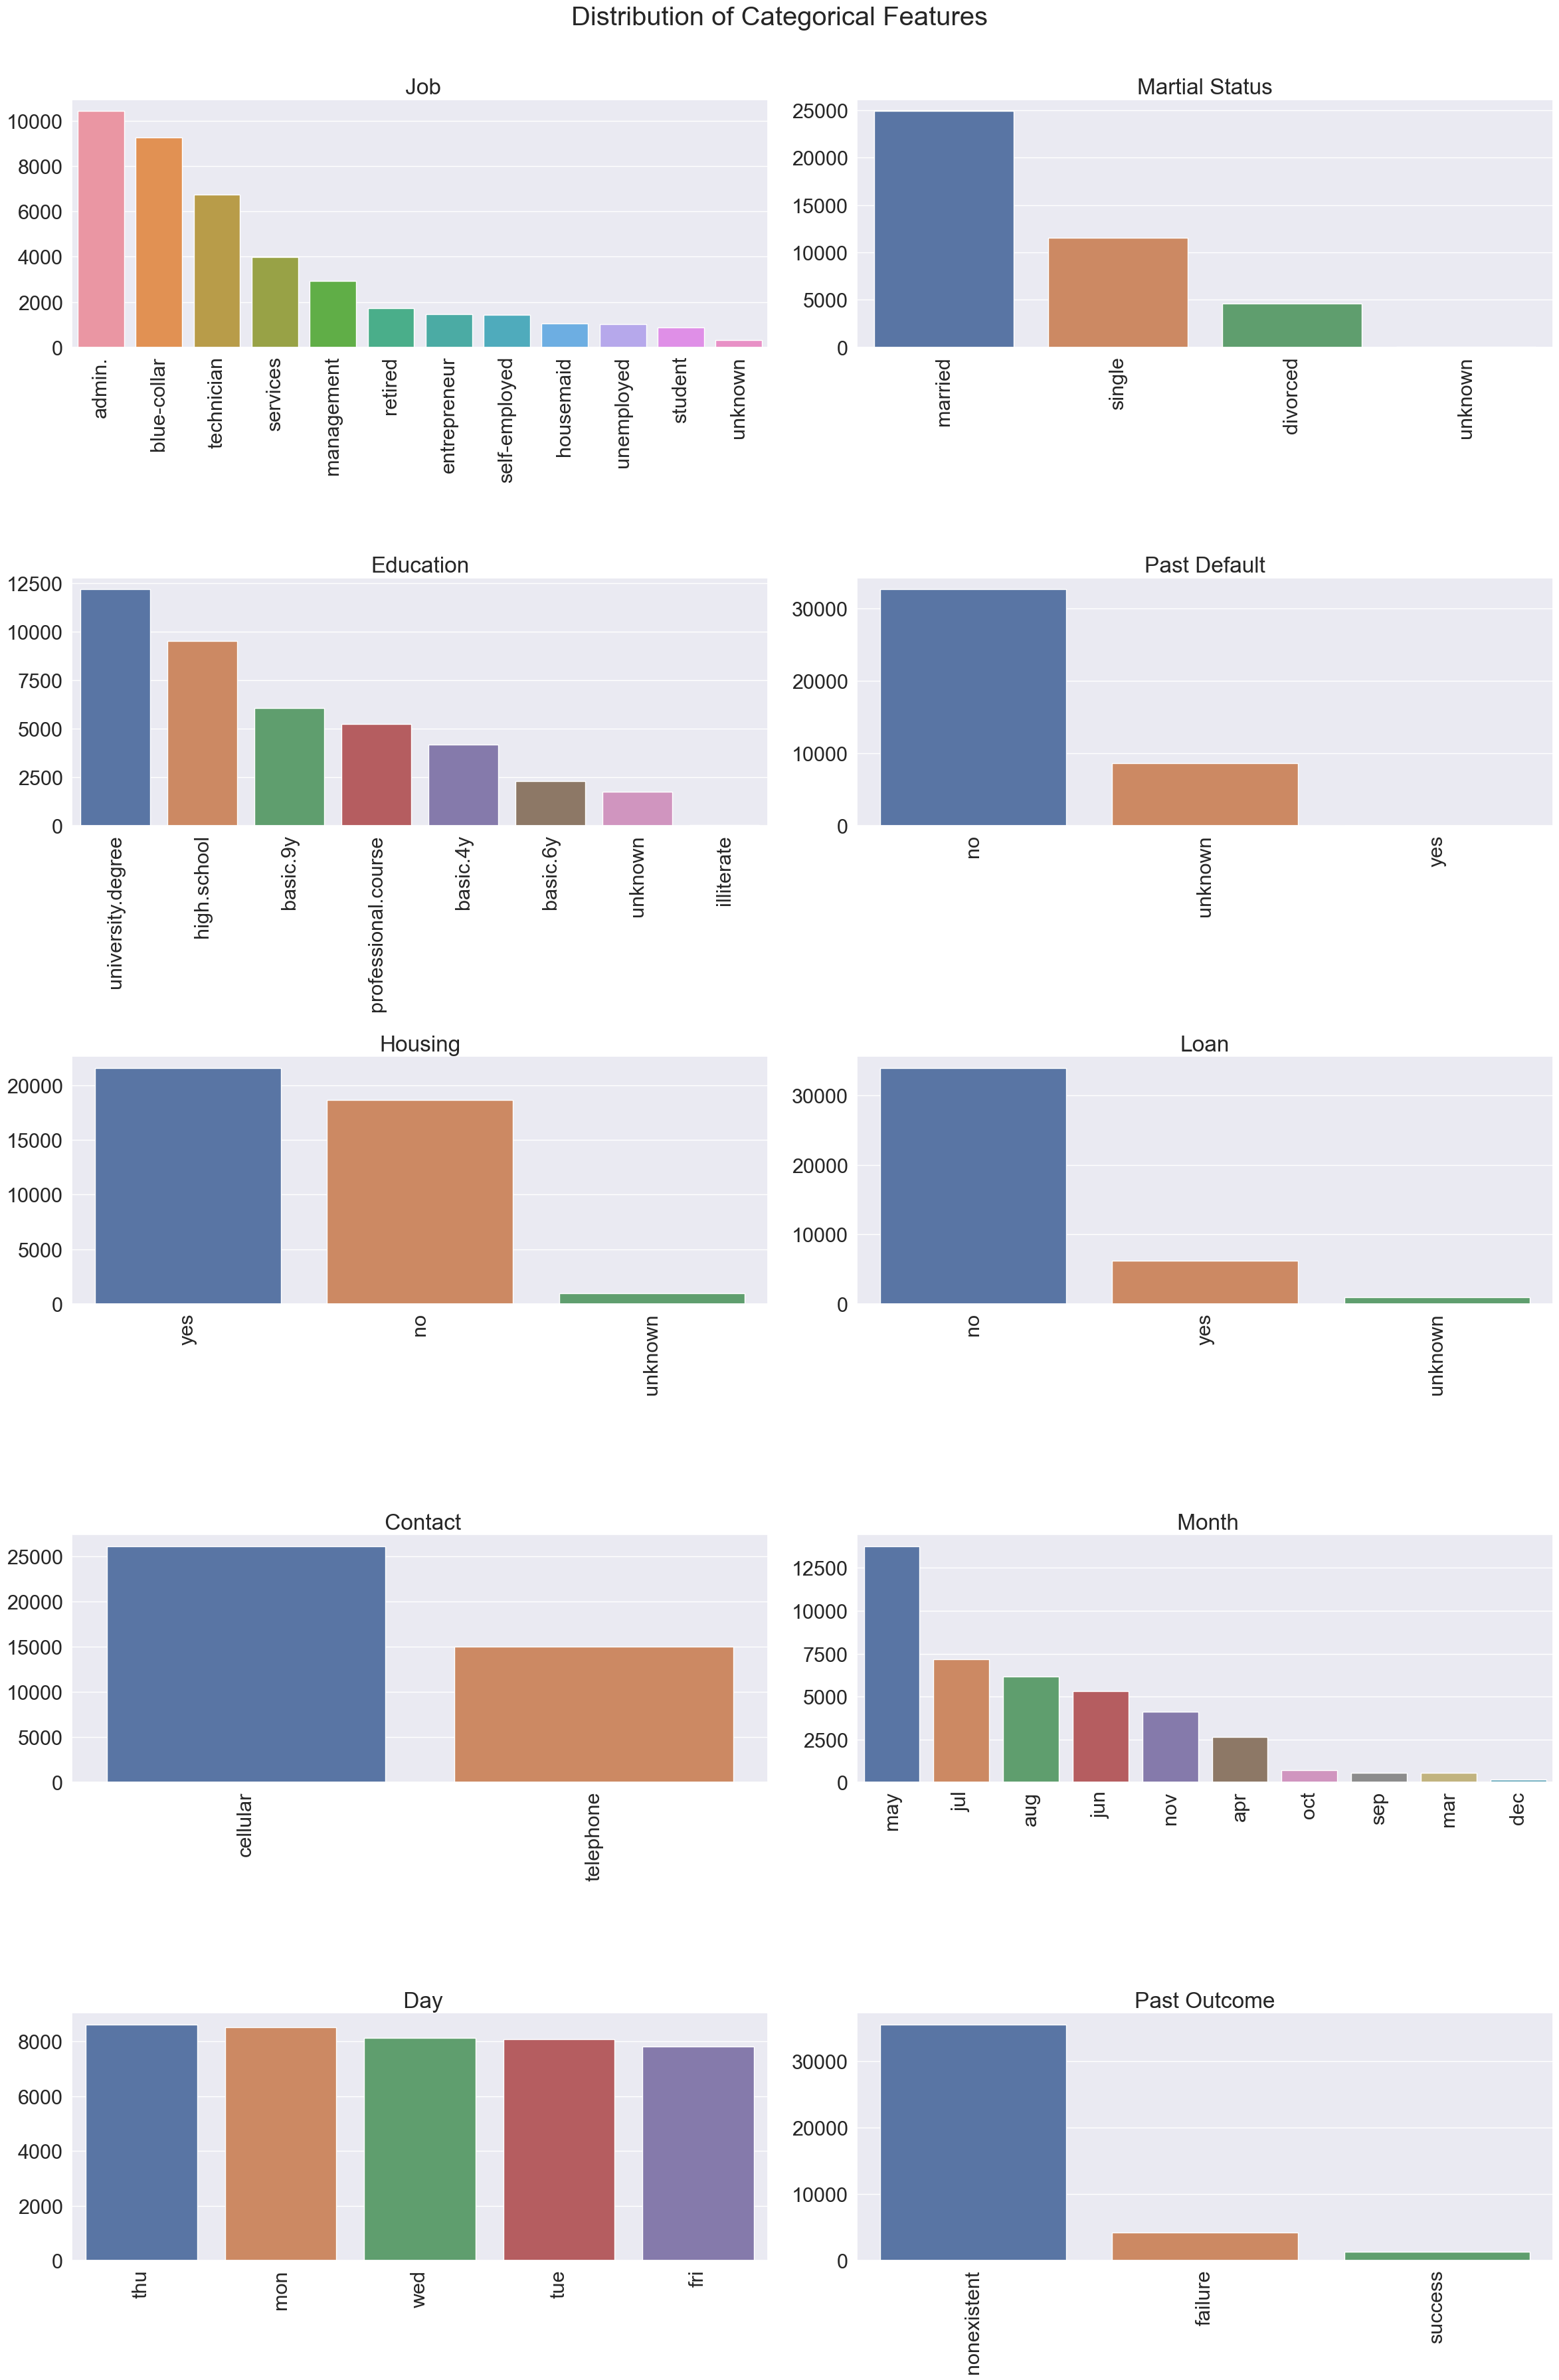

In [576]:
fig, ax = plt.subplots(5, 2, figsize=(24,36))
fig.suptitle('Distribution of Categorical Features', y=1.)

def add_subplot(feature, plot_x, plot_y, title):
    plot = sns.countplot(x=feature, data=df, ax=ax[plot_x, plot_y], order = df[feature].value_counts().index);
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
    plot.set(xlabel=None, ylabel=None)
    
add_subplot('job',0,0," Job")
add_subplot('marital',0,1,"Martial Status")
add_subplot('education',1,0,"Education")
add_subplot('default',1,1,"Past Default")
add_subplot('housing',2,0,"Housing")
add_subplot('loan',2,1,"Loan")
add_subplot('contact',3,0," Contact")
add_subplot('month',3,1," Month")
add_subplot('day_of_week',4,0," Day")
add_subplot('poutcome',4,1,"Past Outcome")

fig.tight_layout()

### <span style="color: red; "> 3-4-4- Heatmap for categorical variables with target variable  </span>  

### stretegy:
#### 1- at fitest define Plot setting
#### 2- plot  two or four of features together to have good figure size 
#### 3- Findings 


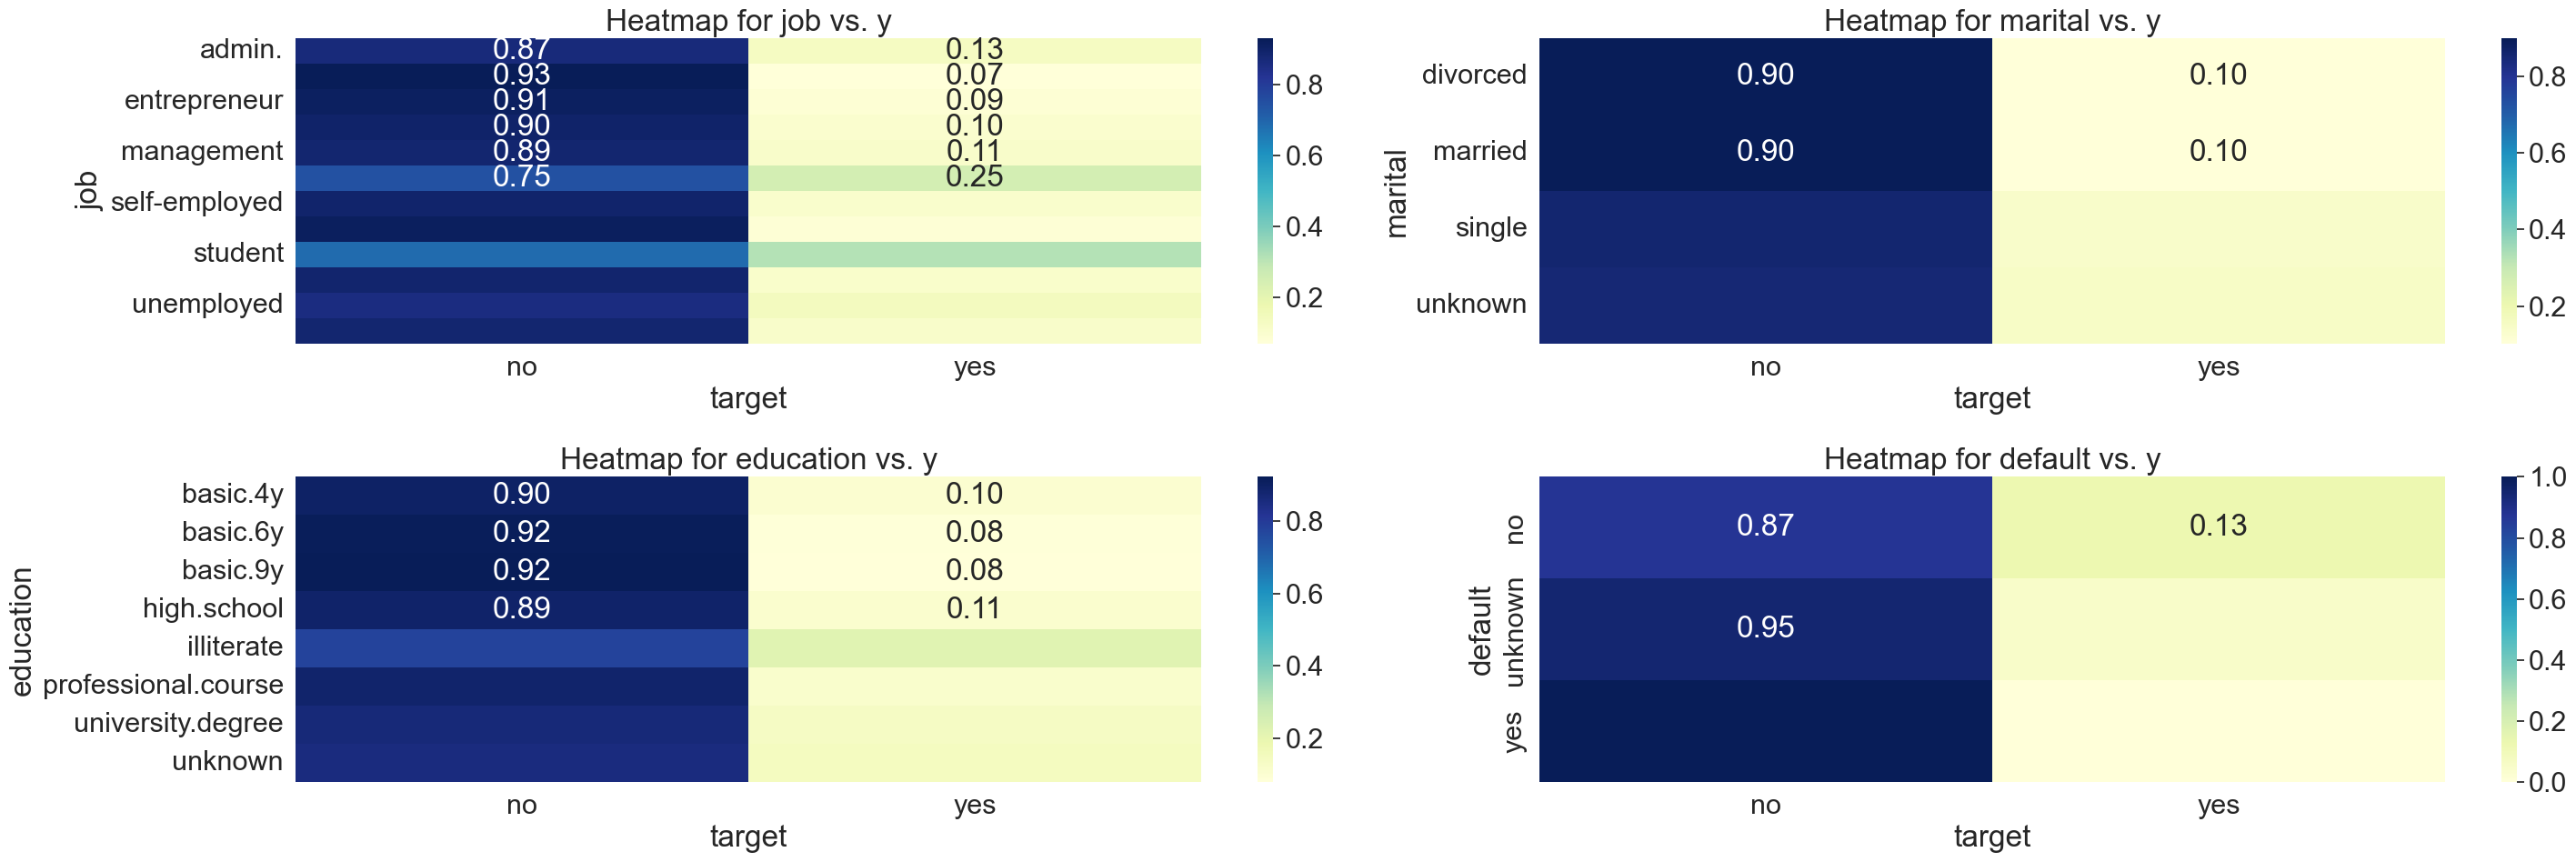

In [577]:
# Create the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(30, 10))  # Adjust figsize based on desired size
categorical_cols1= ['job', 'marital', 'education', 'default']

# Loop through categorical columns and create heatmaps
col_idx = 0
for row in range(2):
  for col in range(2):
    if col_idx >= len(categorical_cols1):
      break  # No more columns to process
    cross_tab = pd.crosstab(df[categorical_cols1[col_idx]], df['target'], normalize='index')
    ax = axes[row, col]  # Get the current subplot axis
    sns.heatmap(cross_tab, ax=ax, annot=True, cmap='YlGnBu', fmt='.2f')
    ax.set_title(f'Heatmap for {categorical_cols1[col_idx]} vs. y')
    ax.set_xlabel('target')
    ax.set_ylabel(categorical_cols1[col_idx])
    col_idx += 1

# Adjust layout (optional)
plt.tight_layout()  # Adjust spacing between subplots

plt.show()

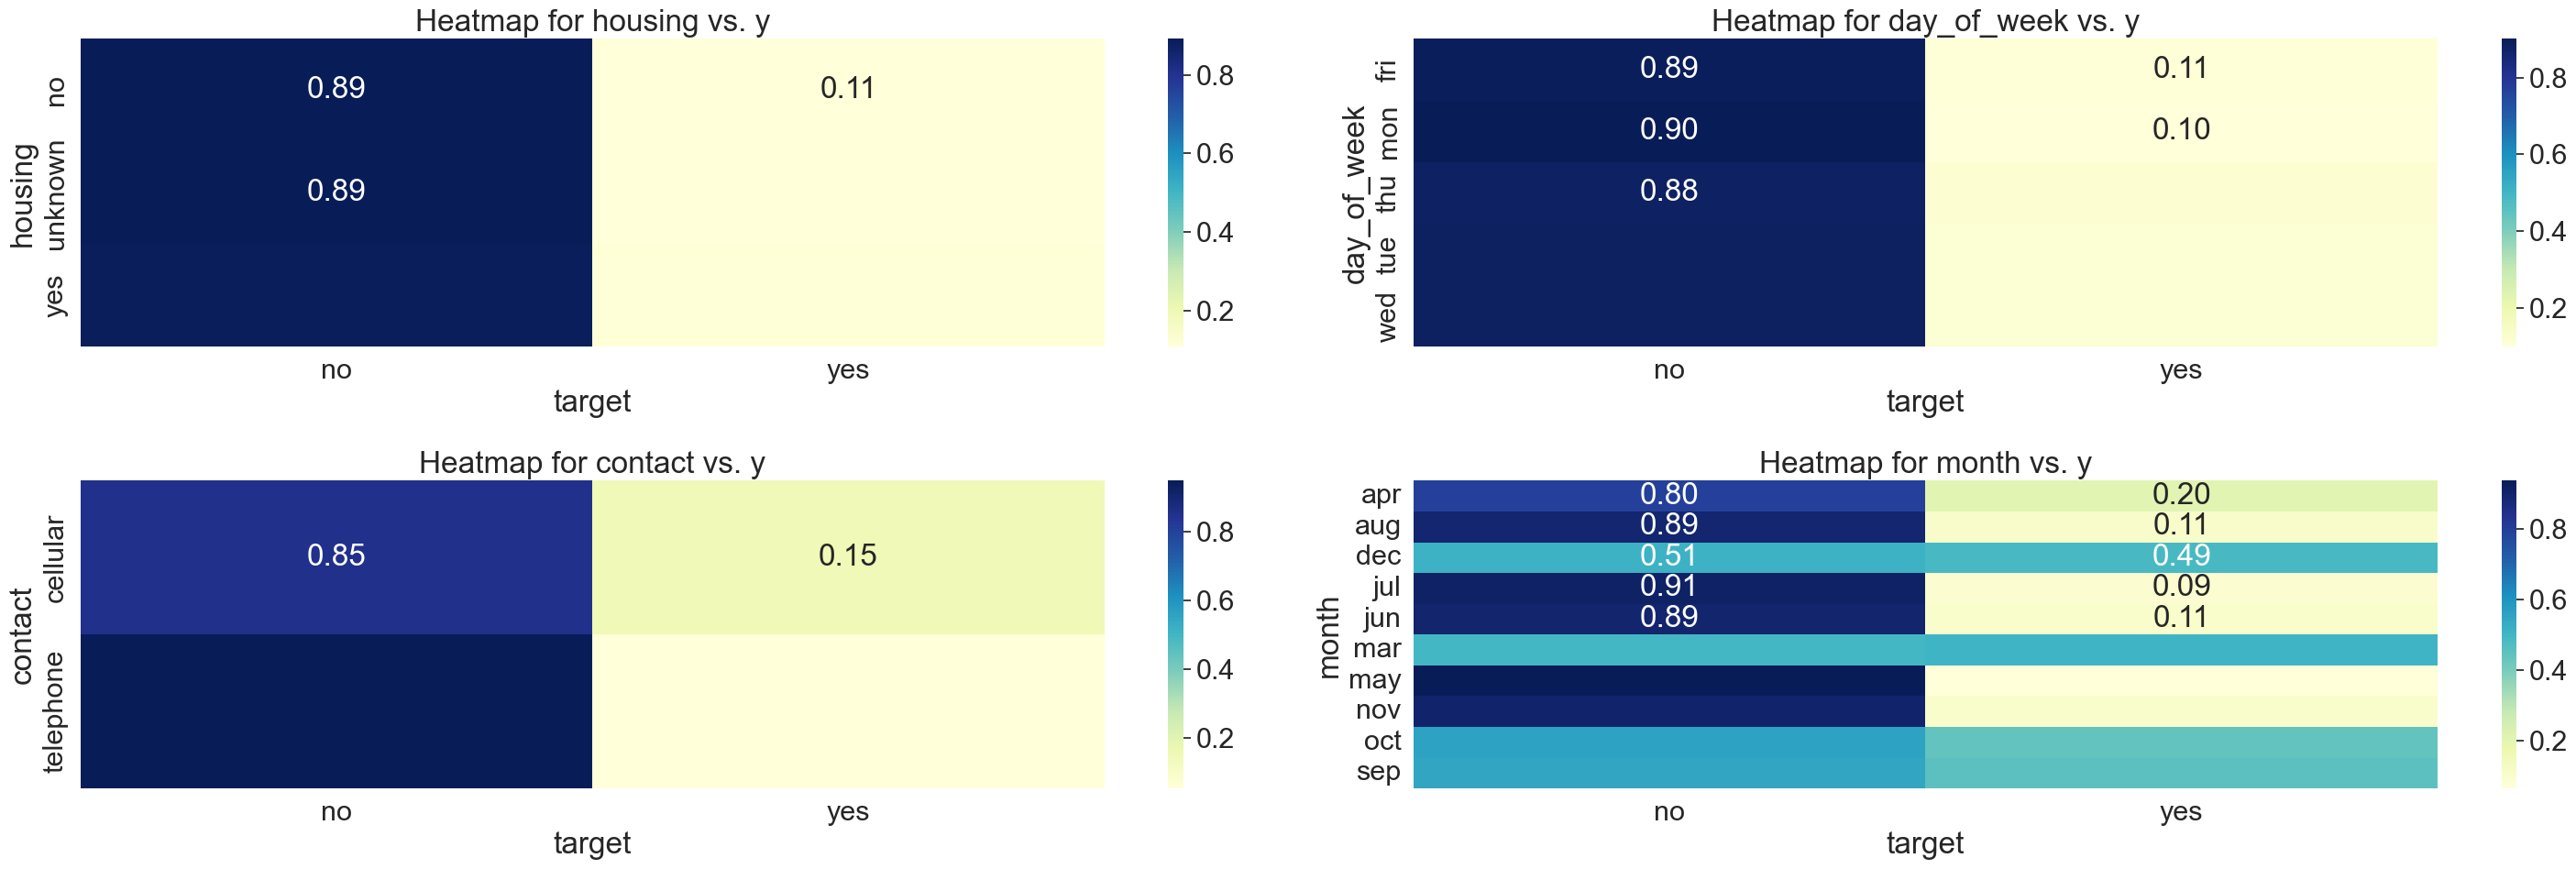

In [578]:
# Create the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(30, 10))  # Adjust figsize based on desired size
categorical_cols1= [ 'housing', 'day_of_week', 'contact', 'month']

# Loop through categorical columns and create heatmaps
col_idx = 0
for row in range(2):
  for col in range(2):
    if col_idx >= len(categorical_cols1):
      break  # No more columns to process
    cross_tab = pd.crosstab(df[categorical_cols1[col_idx]], df['target'], normalize='index')
    ax = axes[row, col]  # Get the current subplot axis
    sns.heatmap(cross_tab, ax=ax, annot=True, cmap='YlGnBu', fmt='.2f')
    ax.set_title(f'Heatmap for {categorical_cols1[col_idx]} vs. y')
    ax.set_xlabel('target')
    ax.set_ylabel(categorical_cols1[col_idx])
    col_idx += 1

# Adjust layout (optional)
plt.tight_layout()  # Adjust spacing between subplots

plt.show()

### <span style="color: red; "> 3-4-5- Probability of success with attention to categorical variables </span>  

### stretegy:
#### 1- at fitest define Plot setting
#### 2- plot  two or four of features together to have good figure size 
#### 3- Findings 


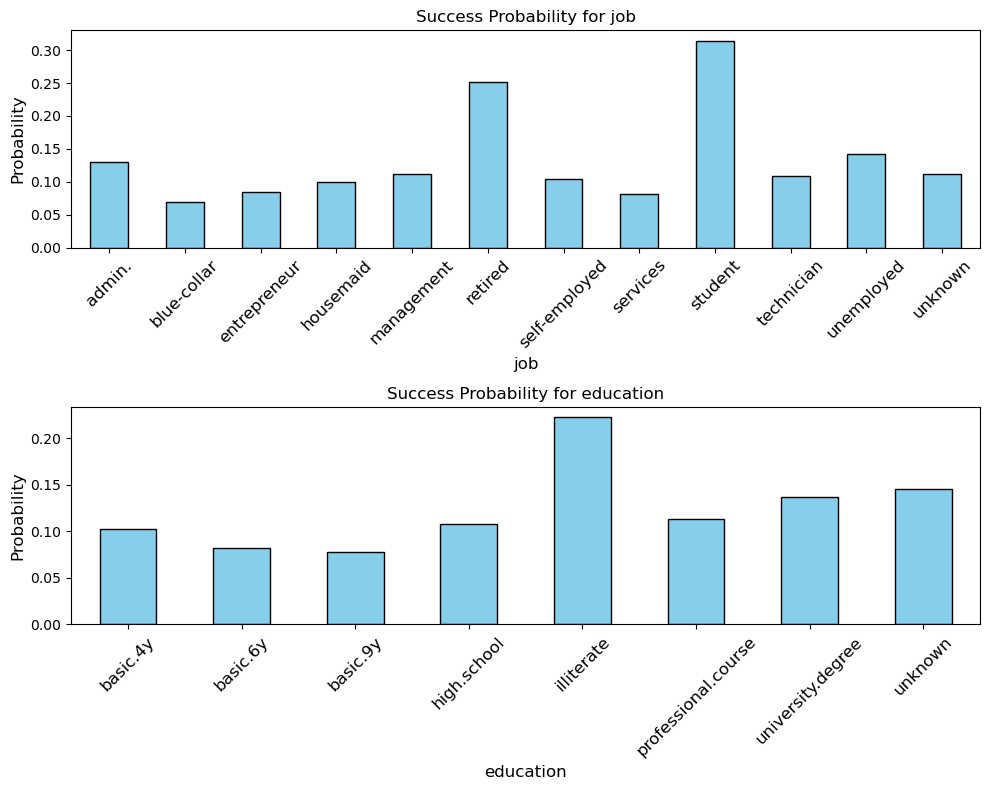

In [56]:
# Plot settings
categorical_cols= ['job', 'education']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))  # Adjust grid if needed
axes = axes.flatten()

# Loop through each categorical feature and plot probability of success
for i, col in enumerate(categorical_cols):
    # Compute success probability for each category
    prob_df = df.groupby(col)['target'].value_counts(normalize=True).unstack()
    
    if 'yes' in prob_df.columns:
        prob_df['yes'].plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    
    axes[i].set_title(f'Success Probability for {col}', fontsize = 12)
    axes[i].set_ylabel('Probability', fontsize=12)
    axes[i].set_xlabel(col, fontsize =12)
    axes[i].set_xticklabels(prob_df.index, rotation=45, fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.show()

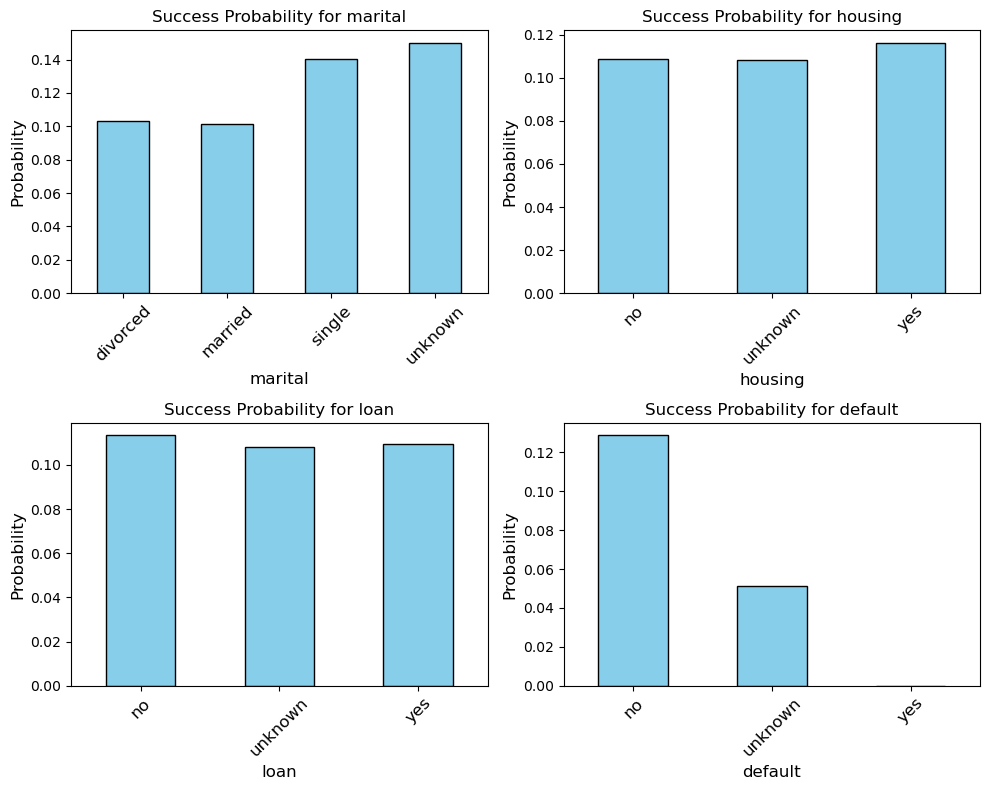

In [57]:
# Plot settings
categorical_cols= ['marital', 'housing', 'loan', 'default']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # Adjust grid if needed
axes = axes.flatten()

# Loop through each categorical feature and plot probability of success
for i, col in enumerate(categorical_cols):
    # Compute success probability for each category
    prob_df = df.groupby(col)['target'].value_counts(normalize=True).unstack()
    
    if 'yes' in prob_df.columns:
        prob_df['yes'].plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    
    axes[i].set_title(f'Success Probability for {col}', fontsize = 12)
    axes[i].set_ylabel('Probability', fontsize=12)
    axes[i].set_xlabel(col, fontsize =12)
    axes[i].set_xticklabels(prob_df.index, rotation=45, fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.show()

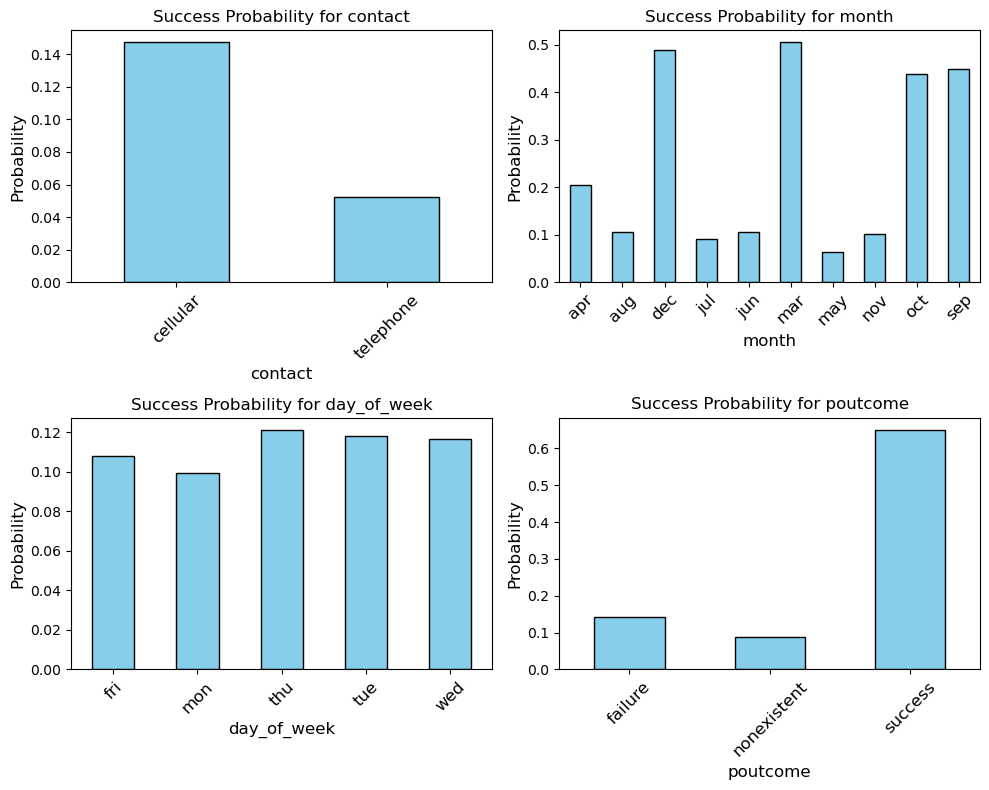

In [58]:
#Plot settings
categorical_cols= ['contact', 'month', 'day_of_week', 'poutcome']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))  # Adjust grid if needed
axes = axes.flatten()

# Loop through each categorical feature and plot probability of success
for i, col in enumerate(categorical_cols):
    # Compute success probability for each category
    prob_df = df.groupby(col)['target'].value_counts(normalize=True).unstack()
    
    if 'yes' in prob_df.columns:
        prob_df['yes'].plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    
    axes[i].set_title(f'Success Probability for {col}', fontsize = 12)
    axes[i].set_ylabel('Probability', fontsize=12)
    axes[i].set_xlabel(col, fontsize =12)
    axes[i].set_xticklabels(prob_df.index, rotation=45, fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.show()

<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 

#### <span style="color: blue; "> Points for probability of success with attention to categorical features  </span> 
1. <span style="color: red; ">  Success + job </span>  two groups have highest level of success ( <span style=" color: blue; "> studnets, and retired </span>). it seems really unbeliveable
2. <span style="color: red; ">  Success + Eduction </span>  <span style=" color: blue; "> two groups have highest level of success ( illiterate and university degree). 
3. <span style="color: red; ">  Success + maritual state: </span>  <span style=" color: blue; "> single has the highest probability </span> 
4. <span style="color: red; ">  Success + Housing: </span>  <span style=" color: blue; "> are approximately the same and having house loan is not so important, while a person has this loan has also a little bit more to accept the suggestion </span>
5.  <span style="color: red; ">  Success + loan: </span>  <span style=" color: blue; "> there is no significat different   </span>
6. <span style="color: red; ">  Success + default: </span>  <span style=" color: blue; "> if person does not have credit, there is higher possible to be success and absorb that peroson's meney  </span> 
7. <span style="color: red; ">  Success + kind of contact </span>  <span style=" color: blue; "> cellular is very better than telphone </span> 
8. <span style="color: red; ">  Success + month: </span>  <span style=" color: blue; "> March is the highest. Moreover, December, October and September has high rate too  </span>
9.  <span style="color: red; ">  Success + day: </span>  <span style=" color: blue; "> Tusesay is better, Monday has minimum level of success rate.
However, there is no significat difference    </span>
10. <span style="color: red; ">  Success + poutcome: </span>  <span style=" color: blue; ">  if outcome of the previous marketing campaign is success, then the rate of success in this campaign is high too    </span>                                                                                                                                     
                                                                                                                                                                                                                                                                                                                                                                                            
</div>

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

<span style="color: red; ">  **Answer:** </span> 

#### <span style="color: red; ">   1-Problem Definition:  </span>   
During 2008-2010, the world experienced financial crieses, and there was a huge pressure on European banks to increase financial asset. To solve this issue, campaign marketing in Portugal as a case study of this project started. They created different campaigns.

#### <span style="color: red; ">  2- Strategy:  </span>   
strategy was to offer attractive long-term deposit applications with good interest rates, particularly by using directed marketing campaigns. Thus, there is a need for improvement in efficiency: lesser customer contacts must be done, but same success rate (clients subscribing to the deposit) must be maintained.

#### <span style="color: red; ">  3- Efficinecy issue:  </span>   
In this perspective bank can increase the efficiency of its marketing campaigns, reduce costs, and improve conversion rates, ultimately leading to better customer targeting and higher profitability

### <span style="color: red; ">  4- Business objective:  </span>  
Business objective of this poroject is to predict whether a client will subscribe to a term deposit based on various client, campaign,  economic and social indicators.



### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### <span style="color: red; ">  Point: It has 6 steps:  </span>
1- check the dataset info to be sure have all data 

2- Remove Highly Correlated feaute

3- Split the data into features and target

4- Identify categorical and numerical columns

5- Encode the target variable

6-  Define the preprocessor, use standardScaler for numerical columns and OneHotEncoder for categrical columns 

In [70]:
#1-let check again data info to be sure we have all data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41176 non-null  int64  
 1   job          41176 non-null  object 
 2   marital      41176 non-null  object 
 3   education    41176 non-null  object 
 4   default      41176 non-null  object 
 5   housing      41176 non-null  object 
 6   loan         41176 non-null  object 
 7   contact      41176 non-null  object 
 8   month        41176 non-null  object 
 9   day_of_week  41176 non-null  object 
 10  duration     41176 non-null  int64  
 11  campaign     41176 non-null  int64  
 12  pdays        41176 non-null  int64  
 13  previous     41176 non-null  int64  
 14  poutcome     41176 non-null  object 
 15  emp_var      41176 non-null  float64
 16  cpi          41176 non-null  float64
 17  conf         41176 non-null  float64
 18  euribor3m    41176 non-null  float64
 19  nr_emp   

In [71]:
#2- At first we dorp the feature with higest multicolinearity corrletion. as we find it in problem 3, it is emp_var feature 
df=df.drop( 'emp_var', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          41176 non-null  int64  
 1   job          41176 non-null  object 
 2   marital      41176 non-null  object 
 3   education    41176 non-null  object 
 4   default      41176 non-null  object 
 5   housing      41176 non-null  object 
 6   loan         41176 non-null  object 
 7   contact      41176 non-null  object 
 8   month        41176 non-null  object 
 9   day_of_week  41176 non-null  object 
 10  duration     41176 non-null  int64  
 11  campaign     41176 non-null  int64  
 12  pdays        41176 non-null  int64  
 13  previous     41176 non-null  int64  
 14  poutcome     41176 non-null  object 
 15  cpi          41176 non-null  float64
 16  conf         41176 non-null  float64
 17  euribor3m    41176 non-null  float64
 18  nr_emp       41176 non-null  float64
 19  target   

In [72]:
#3- Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

In [73]:
#4- Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
print ("categorical columns: ", categorical_columns)
print ("numerical columns:", numerical_columns)

categorical columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'cpi', 'conf', 'euribor3m', 'nr_emp']


In [74]:
#5- Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)
# check the performance of encoder 
y

array([0, 0, 0, ..., 0, 1, 0])

In [75]:
#6- Define the preprocessor
# standardScaler for numerical columns 
# OneHotEncoder for categrical columns 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

In [76]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'duration', 'campaign', 'pdays',
                                  'previous', 'cpi', 'conf', 'euribor3m',
                                  'nr_emp']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month',
                                  'day_of_week', 'poutcome'])])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

#### <span style="color: red; ">  **Point: Imbalance Dataset** </span>  
Our target variable in imbalance, then we should use the approach attetion to this. 
There are different approaches to split imbalace classification. here are some of them 
1. Oversampling
2. Undersampling
3. Hybrid Methods
4. Class Weighting
5. Algorithm-Level Methods
6. Data Augmentation

there are different methods with these approaches, I use stratify here 

In [77]:
# Split data into training and testing sets for Logistic, KNN, SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [78]:
X_train.shape, X_test.shape

((32940, 19), (8236, 19))

In [79]:
y_train.shape, y_test.shape

((32940,), (8236,))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [40]:
# Dummy calssifer is Baseline model 
from sklearn.dummy import DummyClassifier

In [41]:
# Create a Dummy Classifier
dm_clf = DummyClassifier(strategy="most_frequent")
dm_clf.fit(X_train, y_train)

# Make predictions
y_pred = dm_clf.predict(X_test)

# accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Dummy Classifier Accuracy:", round(accuracy,2))

#classification report 
clf_rep = classification_report(y_test, y_pred) 
print ('\n')
print ("Classification Report:\n ", clf_rep ) 

Dummy Classifier Accuracy: 0.89


Classification Report:
                precision    recall  f1-score   support

           0       0.89      1.00      0.94      7308
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8236
   macro avg       0.44      0.50      0.47      8236
weighted avg       0.79      0.89      0.83      8236



#### <span style="color: red; ">  **Interpretation of results for Baseline model** </span> 
Baseline model is dummy classifier. 

<span style="color: red; ">1- Precision for y=0 is 89%, where it comes?   </span>   
it comes exactly from shape of target variable. as we see at the begining of the poject target variable shape was (no: 0.89 , yes: 0.11). dummy classifier means it is easy, without knowing the models, we can predict that client saty no with the proability of 89% .

<span style="color: red; ">2-Recall for y=0 is 100%   </span>   because the logic of dummy variable is we chose y=0. 

<span style="color: red; ">3-precision and recall for  y=0  are 0.0%</span>  it is clear with attention to points 1 and 2

<span style="color: red; ">4- f1: </span> for y=0 is 0.94 and for y=1 is 0 

<span style="color: red; ">5- accuracy: 0.89: </span> It is exactly as the share of y=0 is the model. it means dummy baseline model, with only looking at the shape of target variable, can get accuracy 0.89%, as you can get it if you look at the shape of target variable 



### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [80]:
# Create a logistic regression model
lgr_sim_pipe = Pipeline([
    ('transform', preprocessor),
    ('lgr_basic_model', LogisticRegression())])


# Fit the model on training data
lgr_sim_pipe.fit(X_train, y_train)

# Make predictions on test data
y_pred = lgr_sim_pipe.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [81]:
# accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", round(accuracy,2))

#classification report 
clf_rep = classification_report(y_test, y_pred) 
print ('\n')
print ("Classification Report:\n ", clf_rep ) 


Logistic Regression Accuracy: 0.91


Classification Report:
                precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.66      0.42      0.51       928

    accuracy                           0.91      8236
   macro avg       0.79      0.70      0.73      8236
weighted avg       0.90      0.91      0.90      8236



#### <span style="color: red; ">  **Point: Score of Simple model (0.91) is higher than Baseline model (0.89)** </span> 

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |


#### <span style="color: red; ">  **10- 1- Models, one by one** </span> 


##### <span style="color: red; ">  **10- 1-1- Decision Tree model** </span> 

In [82]:
# Create a logistic regression model
model1 = Pipeline([
    ('transform', preprocessor),
    ('Decision Tree', DecisionTreeClassifier() )])

start_time = time.time()
# Fit the model on training data
model1.fit(X_train, y_train)
end_time = time.time()

# Make predictions on test data
y_pred = model1.predict(X_test)

# Evaluate on training and test sets and time
model=model1
fit_time = end_time - start_time
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = []
name='Decision Tree'
# Append the results
results.append([name, train_score, test_score, fit_time, precision, recall, f1])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Score', 'Test Score', 'Average Fit Time', 'Precision', 'Recal', 'f1'])
results_df.set_index('Model', inplace=True)


In [83]:
# accuracy 
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy_dt,2))

#classification report 
clf_rep=[]
clf_rep_dt = classification_report(y_test, y_pred) 
clf_rep.append( clf_rep_dt)
print ('\n')
print ("Classification Report:\n ", clf_rep_dt ) 


Accuracy: 0.89


Classification Report:
                precision    recall  f1-score   support

           0       0.94      0.94      0.94      7308
           1       0.52      0.51      0.51       928

    accuracy                           0.89      8236
   macro avg       0.73      0.73      0.73      8236
weighted avg       0.89      0.89      0.89      8236



In [84]:
results_df.round(2)

,Train Score,Test Score,Average Fit Time,Precision,Recal,f1
Model,,,,,,
Decision Tree,1.0,0.89,1.32,0.52,0.51,0.51


##### <span style="color: red; ">  **10- 1-2- KNN model** </span> 

In [85]:
# Create a logistic regression model
model1 = Pipeline([
    ('transform', preprocessor),
    ('Decision Tree', KNeighborsClassifier() )])

start_time = time.time()
# Fit the model on training data
model1.fit(X_train, y_train)
end_time = time.time()

# Make predictions on test data
y_pred = model1.predict(X_test)

# Evaluate on training and test sets and time
model=model1
fit_time = end_time - start_time
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

name='KNN'
# Append the results
results.append([name, train_score, test_score, fit_time, precision, recall, f1])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Score', 'Test Score', 'Average Fit Time', 'Precision', 'Recal', 'f1'])
results_df.set_index('Model', inplace=True)

In [86]:
# accuracy 
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy_knn,2))

#classification report 
clf_rep_knn = classification_report(y_test, y_pred) 
clf_rep.append( clf_rep_knn)
print ('\n')
print ("Classification Report:\n ", clf_rep_knn ) 

Accuracy: 0.9


Classification Report:
                precision    recall  f1-score   support

           0       0.93      0.96      0.95      7308
           1       0.59      0.44      0.50       928

    accuracy                           0.90      8236
   macro avg       0.76      0.70      0.72      8236
weighted avg       0.89      0.90      0.90      8236



In [87]:
results_df.round(2)

,Train Score,Test Score,Average Fit Time,Precision,Recal,f1
Model,,,,,,
Decision Tree,1.00,0.89,1.32,0.52,0.51,0.51
KNN,0.93,0.90,0.21,0.59,0.44,0.50




##### <span style="color: red; ">  **10- 1-3-SVM** </span> 

In [88]:
# Create a logistic regression model
model1 = Pipeline([ 
    ('transform', preprocessor),
    ('SVM', SVC()) ])

start_time = time.time()

# Fit the model on training data
model1.fit(X_train, y_train)

end_time = time.time()

# Make predictions on test data
y_pred = model1.predict(X_test)

# Evaluate on training and test sets and time
model=model1
fit_time = end_time - start_time
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

name='SVC'
# Append the results
results.append([name, train_score, test_score, fit_time, precision, recall, f1])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Score', 'Test Score', 'Average Fit Time', 'Precision', 'Recal', 'f1'])
results_df.set_index('Model', inplace=True)

In [89]:
# accuracy 
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy_svm,2))

#classification report 
clf_rep_svm = classification_report(y_test, y_pred) 
clf_rep.append( clf_rep_svm)
print ('\n')
print ("Classification Report:\n ", clf_rep_svm ) 

Accuracy: 0.91


Classification Report:
                precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.67      0.43      0.53       928

    accuracy                           0.91      8236
   macro avg       0.80      0.70      0.74      8236
weighted avg       0.90      0.91      0.90      8236



In [90]:
results_df.round(2)

,Train Score,Test Score,Average Fit Time,Precision,Recal,f1
Model,,,,,,
Decision Tree,1.00,0.89,1.32,0.52,0.51,0.51
KNN,0.93,0.90,0.21,0.59,0.44,0.50
SVC,0.92,0.91,33.48,0.67,0.43,0.53


##### <span style="color: red; ">  **10- 1-4- Logistic Regression** </span> 

In [91]:
# Create a logistic regression model
model1 = Pipeline([
    ('transform', preprocessor),
    ('Logistic Regression', LogisticRegression() )])

start_time = time.time()
# Fit the model on training data
model1.fit(X_train, y_train)
end_time = time.time()

# Make predictions on test data
y_pred = model1.predict(X_test)

# Evaluate on training and test sets and time
model=model1
fit_time = end_time - start_time
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

name='Logistic Regression'
# Append the results
results.append([name, train_score, test_score, fit_time, precision, recall, f1])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Score', 'Test Score', 'Average Fit Time', 'Precision', 'Recal', 'f1'])
results_df.set_index('Model', inplace=True)

In [92]:
# accuracy 
accuracy_lr = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy_lr,2))

#classification report 
clf_rep_lr = classification_report(y_test, y_pred) 
clf_rep.append( clf_rep_lr)
print ('\n')
print ("Classification Report:\n ", clf_rep_lr) 

Accuracy: 0.91


Classification Report:
                precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.66      0.42      0.51       928

    accuracy                           0.91      8236
   macro avg       0.79      0.70      0.73      8236
weighted avg       0.90      0.91      0.90      8236



In [93]:
results_df.round(2)

,Train Score,Test Score,Average Fit Time,Precision,Recal,f1
Model,,,,,,
Decision Tree,1.00,0.89,1.32,0.52,0.51,0.51
KNN,0.93,0.90,0.21,0.59,0.44,0.50
SVC,0.92,0.91,33.48,0.67,0.43,0.53
Logistic Regression,0.91,0.91,0.42,0.66,0.42,0.51


### <span style="color: red; ">  **10- 2- Model comparison** </span> 

##### <span style="color: red; ">  **10- 2-1- Classification report** </span> 

In [94]:
# Print detailed reports
print("K-Nearest Neighbors Classification Report:\n", clf_rep_knn)
print("Logistic Regression Classification Report:\n", clf_rep_lr)
print("Decision Tree Classification Report:\n", clf_rep_dt)
print("Support Vector Machine Classification Report:\n", clf_rep_svm)

K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7308
           1       0.59      0.44      0.50       928

    accuracy                           0.90      8236
   macro avg       0.76      0.70      0.72      8236
weighted avg       0.89      0.90      0.90      8236

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7308
           1       0.66      0.42      0.51       928

    accuracy                           0.91      8236
   macro avg       0.79      0.70      0.73      8236
weighted avg       0.90      0.91      0.90      8236

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7308
           1       0.52      0.51      0.51       928

    accuracy                           0.89      8236
  

##### <span style="color: red; ">  **10- 2-2- Scores and time with othe indices** </span> 

In [95]:
print ("Here is the comparison of four models preformance\n")
results_df.round(2)

Here is the comparison of four models preformance



,Train Score,Test Score,Average Fit Time,Precision,Recal,f1
Model,,,,,,
Decision Tree,1.00,0.89,1.32,0.52,0.51,0.51
KNN,0.93,0.90,0.21,0.59,0.44,0.50
SVC,0.92,0.91,33.48,0.67,0.43,0.53
Logistic Regression,0.91,0.91,0.42,0.66,0.42,0.51


### <span style="color: red; ">  **10- 3- Best Model** </span> 

##### <span style="color: red; ">  **Points for comparison of models in Porblem 10:** </span>


#####  <span style="color: blue ; ">  **Section one: comparison with attention to precision, recall and f1:** </span>

1- precision, recall and f1 for y=0: minimum is 93% and maximum is 98%. this is good achievement. 
2- precison, recall and f1 for y=1: min is 40% and max is 70%. comaprison to dummy classifier (all of them were 0%) it is good achievement. But wee need to improve it. as we will do that in next problem. 

##### <span style="color: red; "> Best model: SVM.  </span> 
#####   <span style="color: red; "> Second best model: Logistic Regression.  </span> 



######  <span style="color: blue ; ">  **Section two:comparison with attention to score and time:** </span>

1- maximum train score comes back to decision tree

2- maximum score for test core belongs to svc and logistic regression

3- time: svm has maximum and KNN minimum time. 

4- precision of svc and logistic is maximum 

5- recall of decision tree is maximum

6- f1 of decision tree is maximum 

7- Between four models, svm and logistic regression have higher Test Score, then we should chose the best model with attention to them 

8- svc has higher train score, then if we want to consider both test and train scores, the best model is SVM

9- logistic regression has lower Fit Time, then if we want to be sensitive for fit time too, then we should chose logistic regression 

 
##### <span style="color: red; "> Best model: SVM.  </span> 
#####   <span style="color: red; "> Second best model: Logistic Regression.  </span> If time is important also for you, then you can chose  as


##### <span style="color: red; ">  **Which model up to now is the best?** </span>

##### <span style="color: red; "> Best model: SVM   </span> with attention to all indices together 
#####   <span style="color: red; "> Second best model: Logistic Regression.  </span> with attention to all indices together 





### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

####  <span style="color: red; ">  **Strategy for problem 11 has following process:** </span> 
#### 1. finding features have corellation and remove them to increae the efficiency of the model
#### 2. checking categorical features to see their relative improtance and distribution to make decision to keep them or not
#### 3. split the data 
#### 4. Define hyperparamters for SVM, KNN, Decision Tree, and Logistic Regression  
#### 5. Use gridsearch for all of them
#### 6. Find best parameters for each model one by one
#### 7. permuter the featuers for each model with best parameters 
#### 8. compare again the models to chose the best model among all models we have
#### 9. conlusion of the project. 

### <span style="color: red; ">  **11-1- Correlation** </span> 

In [96]:
# with vairance_inflation_factor found high correlation features 
#df.info()

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def corr_vif(df_input):
    numeric_columns = df_input.select_dtypes(include='number').columns
    X = df_input[numeric_columns]
  
    df_vif = pd.DataFrame()
    df_vif["feature"] = X.columns
  
    df_vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
    return df_vif.sort_values(['VIF'], ascending=False)
    
corr_vif(df)

,feature,VIF
8,nr_emp,18453.070443
5,cpi,17190.065001
6,conf,93.889294
3,pdays,44.385353
0,age,16.040661
7,euribor3m,15.344978
1,duration,2.011057
4,previous,2.001491
2,campaign,1.909425


In [98]:
df.drop(columns=['nr_emp'], inplace=True) # Reduce Multicolinearity
corr_vif(df)

,feature,VIF
5,cpi,161.906914
6,conf,90.499133
3,pdays,43.109116
0,age,16.040043
7,euribor3m,7.860786
1,duration,2.008499
4,previous,1.981270
2,campaign,1.909120


In [99]:
df.drop(columns=['cpi'], inplace=True) # Reduce Multicolinearity
corr_vif(df)

,feature,VIF
5,conf,38.407979
3,pdays,36.526242
0,age,13.376134
6,euribor3m,6.419979
1,duration,1.986404
2,campaign,1.908318
4,previous,1.719832


In [100]:
# now check again with correlation function and heatmap

In [101]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int','float']).columns.tolist()
print(numerical_cols)




['age', 'duration', 'campaign', 'pdays', 'previous', 'conf', 'euribor3m']


In [102]:
#heatmap for the data frame
df_num= df[numerical_cols]
corr = df_num.corr()
corr

,age,duration,campaign,pdays,previous,conf,euribor3m
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,0.129075,0.010852
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.008126,-0.032861
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,-0.013657,0.135169
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,-0.091374,0.296946
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.050929,-0.454571
conf,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,1.000000,0.277864
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.277864,1.000000


<Axes: >

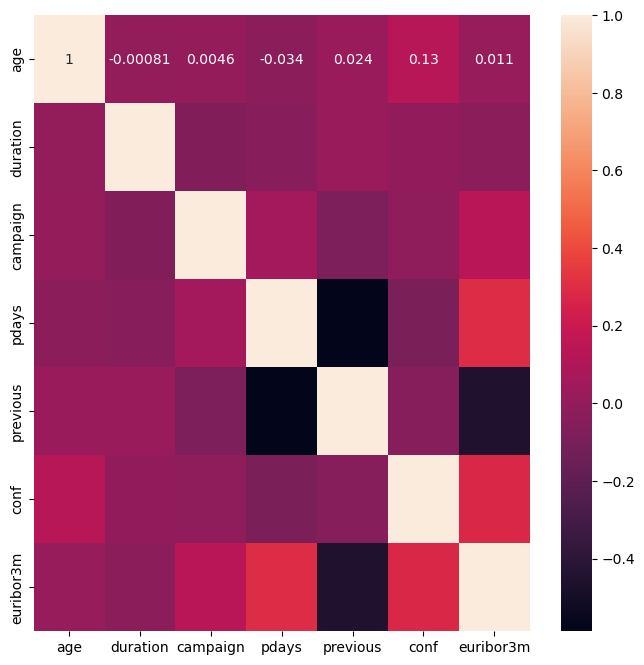

In [103]:
#heatmap for the data frame
plt.subplots(figsize = (8,8))
sns.heatmap(df_num.corr(),annot=True)

<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 

#### <span style="color: blue; ">  **Point: Now our dataset does not have Correlation problem** </span> 


</div>

### <span style="color: red; ">  **11- 2- Feature Engineer for Categorical Features** </span> 

In [148]:
#let check distribuation of all categorical features 

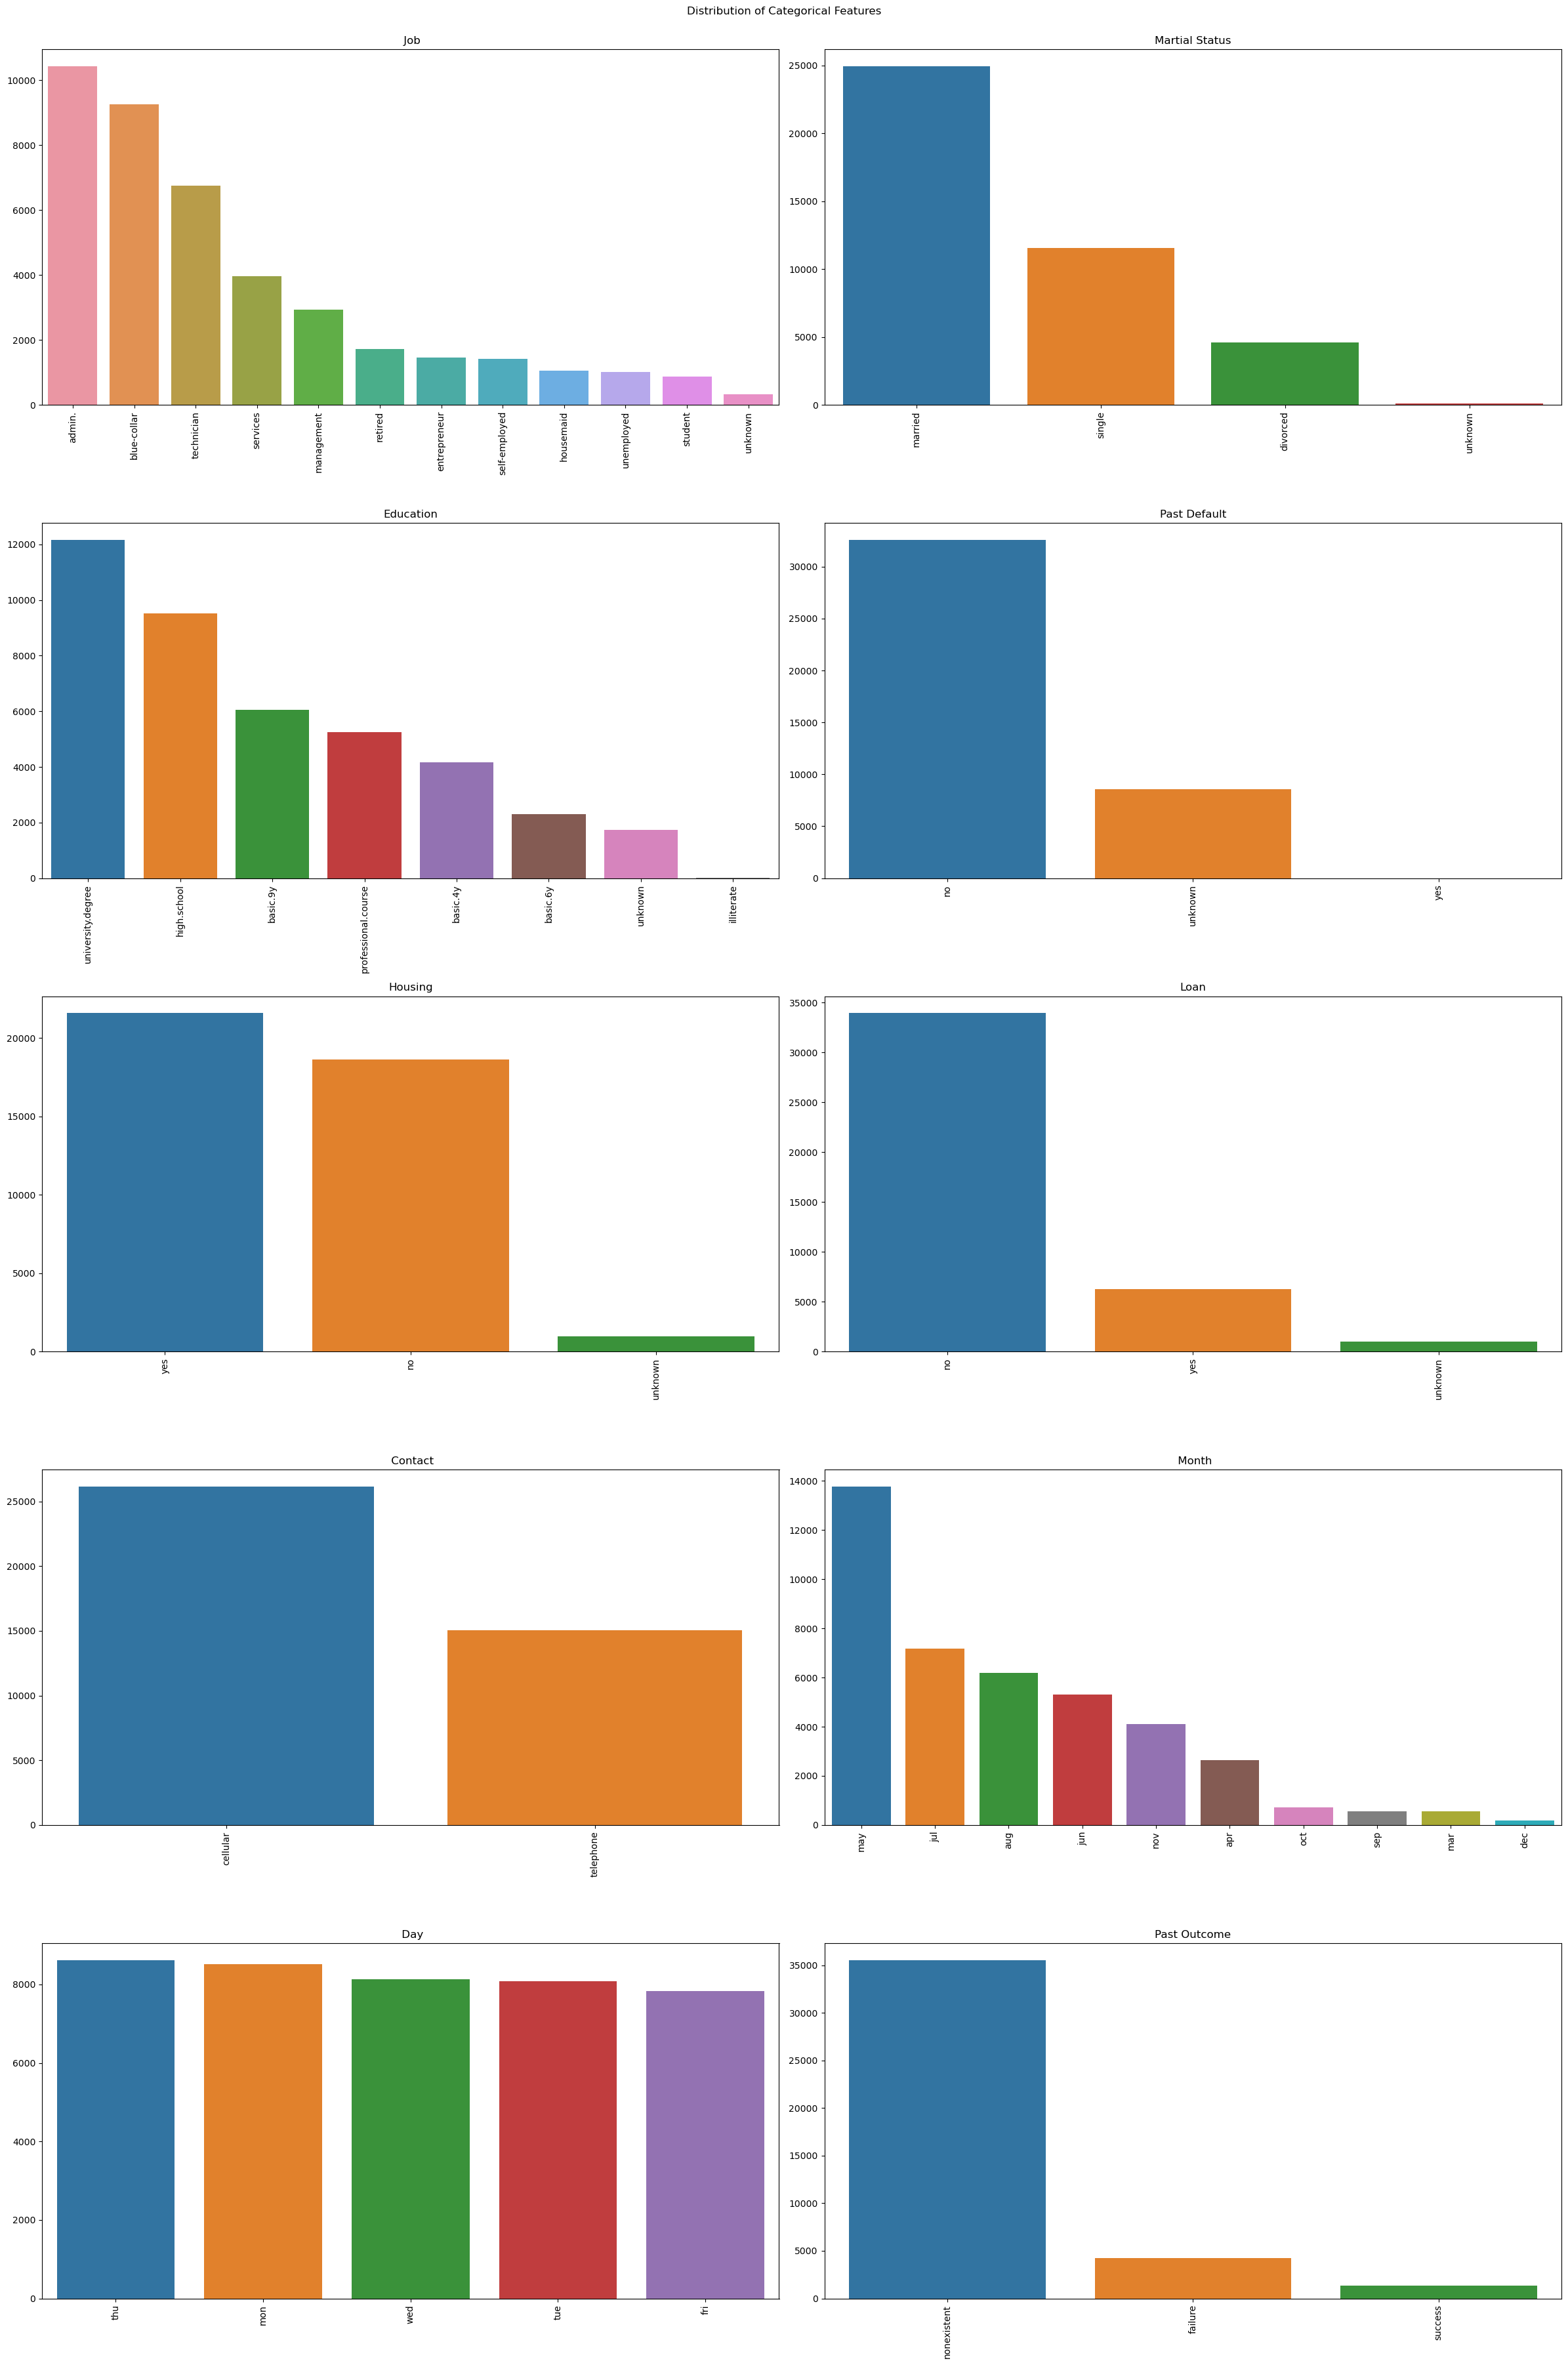

In [155]:
fig, ax = plt.subplots(5, 2, figsize=(24,36))
fig.suptitle('Distribution of Categorical Features', y=1.)

def add_subplot(feature, plot_x, plot_y, title):
    plot = sns.countplot(x=feature, data=df, ax=ax[plot_x, plot_y], order = df[feature].value_counts().index);
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
    plot.set(xlabel=None, ylabel=None)
    
add_subplot('job',0,0," Job")
add_subplot('marital',0,1,"Martial Status")
add_subplot('education',1,0,"Education")
add_subplot('default',1,1,"Past Default")
add_subplot('housing',2,0,"Housing")
add_subplot('loan',2,1,"Loan")
add_subplot('contact',3,0," Contact")
add_subplot('month',3,1," Month")
add_subplot('day_of_week',4,0," Day")
add_subplot('poutcome',4,1,"Past Outcome")

fig.tight_layout()

In [104]:
df.day_of_week.value_counts(normalize= True).round (2)

day_of_week
thu    0.21
mon    0.21
wed    0.20
tue    0.20
fri    0.19
Name: proportion, dtype: float64

In [105]:
# as we see, there are 5 days and all of the are around 20%, then thid feature can not help the model.

In [106]:
df.drop(columns=['day_of_week'], inplace=True)

In [107]:
df.poutcome.value_counts(normalize= True).round (2)

poutcome
nonexistent    0.86
failure        0.10
success        0.03
Name: proportion, dtype: float64

In [108]:
# as we see, 84% of this feature is nonexistence, then we can remover it too 

In [109]:
df.drop(columns=['poutcome'], inplace=True)

<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
    
####  <span style="color: blue; ">  **Point: Now our categorical dataset are reasonable to be in dataset** </span> 

####  <span style="color: blue; ">  **Result: With feature engineerign and checking correlation, we remove 2 categorical and and 2 numerical features** </span>

</div>

### <span style="color: red; ">  **11- 3- Train/Test split** </span> 

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        41176 non-null  int64  
 1   job        41176 non-null  object 
 2   marital    41176 non-null  object 
 3   education  41176 non-null  object 
 4   default    41176 non-null  object 
 5   housing    41176 non-null  object 
 6   loan       41176 non-null  object 
 7   contact    41176 non-null  object 
 8   month      41176 non-null  object 
 9   duration   41176 non-null  int64  
 10  campaign   41176 non-null  int64  
 11  pdays      41176 non-null  int64  
 12  previous   41176 non-null  int64  
 13  conf       41176 non-null  float64
 14  euribor3m  41176 non-null  float64
 15  target     41176 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory usage: 5.3+ MB


In [111]:
# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

In [112]:
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)
# check the performance of encoder 

In [113]:
# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
print ("categorical columns: ", categorical_columns)
print ("numerical columns:", numerical_columns)

categorical columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'conf', 'euribor3m']


In [114]:
#6 Define the preprocessor
# standardScaler for numerical columns 
# OneHotEncoder for categrical columns 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])


In [115]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'duration', 'campaign', 'pdays',
                                  'previous', 'conf', 'euribor3m']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month'])])

In [116]:
# Split data into training and testing sets for Logistic, KNN, SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [117]:
X_train.shape, X_test.shape

((32940, 15), (8236, 15))

In [118]:
y_train.shape, y_test.shape

((32940,), (8236,))

### <span style="color: red; ">  **11- 4- Tuning huyperparamters with Gridsearch to get best paramters model one by one** </span> 

In [13]:
#defining grid search to best parameters for every model 

In [119]:
def grid_search_hyperparams( name, pipeline, params):
   
    grid_search = GridSearchCV(pipeline, param_grid=params)

    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time)
         
    # Get the best estimator and paramtors 
    bestmodels= []
    bestparams=[]

    best_model = grid_search.best_estimator_
    bestmodels.append (best_model)
    best_params = grid_search.best_params_
    bestparams.append (best_params)
    
    #best parameters 
    print (f'\n ---------------------------*******************************************--------------------------------')
    
    print(f'\n Best Params for {name} classification is \n: {best_params}')

    print (f'\n ---------------------------*******************************************--------------------------------')

##### <span style="color: red; ">  **11-4-1- Decision Tree( best parameters)** </span> 

In [120]:
#parameters for Decision Tree 
params =  {'model__criterion': ['gini', 'entropy', 'log_loss'],
           'model__max_depth': [3,  5, 10],
          }

# to save results and then compare

bestmodels= []
bestparams=[]

#Pipleline for 
pipeline = Pipeline([('preprocessor',preprocessor),('model',DecisionTreeClassifier())])
grid_search_hyperparams(' Decision Tree', pipeline, params)


 ---------------------------*******************************************--------------------------------

 Best Params for  Decision Tree classification is 
: {'model__criterion': 'gini', 'model__max_depth': 3}

 ---------------------------*******************************************--------------------------------


##### <span style="color: red; ">  **11-4-2- KNN( best parameters)** </span> 

In [121]:
#parameters for KNN 
params =  {'model__n_neighbors': [2,3,5,10] ,
           'model__p': [1,2],
           'model__weights':['uniform', 'distance']       } 

# to save results and then compare

bestmodels= []
bestparams=[]
 

#Pipleline for KNN
pipeline = Pipeline([('preprocessor',preprocessor),('model',KNeighborsClassifier())])
grid_search_hyperparams(' KNN', pipeline, params)


 ---------------------------*******************************************--------------------------------

 Best Params for  KNN classification is 
: {'model__n_neighbors': 2, 'model__p': 1, 'model__weights': 'uniform'}

 ---------------------------*******************************************--------------------------------


##### <span style="color: red; ">  **11-4-3- SVM( best parameters)** </span> 

In [122]:
params =  {
           'model__kernel': ['rbf', 'poly', 'linear'],
           'model__C':[0.1, 1, 10]
          }

# to save results and then compare

bestmodels= []
bestparams=[]


pipeline = Pipeline([('preprocessor',preprocessor),('model',SVC())])
grid_search_hyperparams("SVM", pipeline, params)


 ---------------------------*******************************************--------------------------------

 Best Params for SVM classification is 
: {'model__C': 0.1, 'model__kernel': 'rbf'}

 ---------------------------*******************************************--------------------------------


##### <span style="color: red; ">  **11-4-4- logistic Regression( best parameters)** </span> 

In [129]:
params = {
        'model__C': [1, 10, 100],
    'model__solver': ['lbfgs', 'liblinear']
} 

# to save results and then compare

bestmodels= []
bestparams=[]


pipeline = Pipeline([('preprocessor',preprocessor),('model',LogisticRegression(max_iter=1000))])
grid_search_hyperparams("Logistic Regression", pipeline, params)


 ---------------------------*******************************************--------------------------------

 Best Params for Logistic Regression classification is 
: {'model__C': 1, 'model__solver': 'lbfgs'}

 ---------------------------*******************************************--------------------------------


### <span style="color: red; ">  **11- 5- Camparison of tuned models with best parameters** </span> 

In [2]:
# call again the data and split it. also remove features we have find during the process from EDA to last feature engineering. 

In [130]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

df = df.rename(columns = {
    'emp.var.rate':'emp_var', 'cons.price.idx':'cpi', 
    'cons.conf.idx':'conf', 'nr.employed':'nr_emp',
    'y':'target'
})

df=df.drop( 'emp_var', axis=1)
df.drop(columns=['nr_emp'], inplace=True) # Reduce Multicolinearity
df.drop(columns=['cpi'], inplace=True) # Reduce Multicolinearity
df.drop(columns=['day_of_week'], inplace=True)
df.drop(columns=['poutcome'], inplace=True)


X = df.drop('target', axis=1)
y = df['target']

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
print ("categorical columns: ", categorical_columns)
print ("numerical columns:", numerical_columns)


# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)
# check the performance of encoder 
y

#Define the preprocessor
# standardScaler for numerical columns 
# OneHotEncoder for categrical columns 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])


# Split data into training and testing sets for Logistic, KNN, SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print (X_train.shape, X_test.shape)
y_train.shape, y_test.shape


categorical columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'conf', 'euribor3m']
(32950, 15) (8238, 15)


((32950,), (8238,))

### <span style="color: red; ">  **11- 5-1- Pipeline for best paramters for each model**  </span> 

In [133]:
# Define pipeline 
#`Best Params for  Decision Tree classification`              : {'model__criterion': 'gini', 'model__max_depth': 3}
#`Best Params for  KNN classification`                        : {'model__n_neighbors': 2, 'model__p': 1, 'model__weights': 'uniform'}
#`Best Params for SVM classification`                         : {'model__C': 0.1, 'model__kernel': 'rbf'}
#`Best Params for Logistic Regression classification`        : {'model__C': 1, 'model__solver': 'lbfgs'}
     
logistic = Pipeline ([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C= 1, solver='lbfgs'))
    ])
    
knn = Pipeline ([
    ('preprocessor', preprocessor), 
    ('classifier', KNeighborsClassifier(n_neighbors=2, p=1, weights='uniform'))
    ])
    
decision_tree = Pipeline ([
    ('preprocessor', preprocessor), 
    ('classifier',DecisionTreeClassifier(criterion= 'gini',max_depth=3))
    ])

svm = Pipeline ([
    ('preprocessor', preprocessor), 
    ('classifier', SVC(kernel='rbf',random_state=42, C=0.1))
    ])



In [134]:
# Fit models
logistic.fit(X_train, y_train)
knn.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'conf',
                                                   'euribor3m']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month'])])),
                ('classifier', SVC(C=0.1, random_state=42))])

In [135]:
# Make predictions
logistic_pred = logistic.predict(X_test)
knn_pred = knn.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
svm_pred = svm.predict(X_test)


### <span style="color: red; ">  **11- 5-2- Accuracy and calssification report** </span> 

In [136]:
# Evaluate accuracy
logistic_acc = accuracy_score(y_test, logistic_pred)
knn_acc = accuracy_score(y_test, knn_pred)
decision_tree_acc = accuracy_score(y_test, decision_tree_pred)
svm_acc = accuracy_score(y_test, svm_pred)

In [137]:
# Classification report
logistic_report = classification_report(y_test, logistic_pred)
knn_report = classification_report(y_test, knn_pred)
decision_tree_report = classification_report(y_test, decision_tree_pred)
svm_report = classification_report(y_test, svm_pred)

In [138]:
#some general indies for comparison
def metrics_general (model):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics_general = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label=1),
        'Recall': recall_score(y_test, y_pred, pos_label=1),
        'F1-Score': f1_score(y_test, y_pred, pos_label=1),
        'ROC-AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }

    return metrics_general

In [141]:
# Evaluate the classifiers
knn_metrics_general = metrics_general(knn)
loistic_metrics_general = metrics_general(logistic)
decision_tree_metrics_general = metrics_general(decision_tree)
svm_metrics_general= metrics_general(svm)

In [153]:
# Combine metrics into a DataFrame for easy comparison
results_metrics_general = pd.DataFrame([knn_metrics_general, loistic_metrics_general, decision_tree_metrics_general, svm_metrics_general],
                       index=['KNN', 'Logistic Regression', 'Decision Tree', 'SVM'])
results_metrics_general

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
KNN,0.895484,0.597101,0.221983,0.323645,0.789870
Logistic Regression,0.913693,0.696203,0.414871,0.519919,0.939016
Decision Tree,0.912843,0.614379,0.607759,0.611051,0.878884
SVM,0.908109,0.693878,0.329741,0.447042,NaN


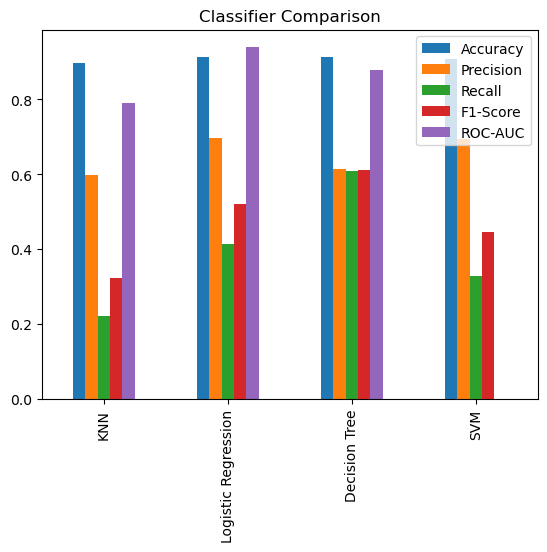

In [154]:
# plot the results
results_metrics_general.plot(kind='bar', title='Classifier Comparison')
plt.show()

In [143]:
# Print accuracy and reports
print(f"Logistic Regression Accuracy: {logistic_acc:.2f}")
print(f"KNN Accuracy: {knn_acc:.2f}")
print(f"Decision Tree Accuracy: {decision_tree_acc:.2f}")
print(f"SVM Accuracy: {svm_acc:.2f}")
print("\nLogistic Regression Classification Report:\n", logistic_report)
print("\nKNN Classification Report:\n", knn_report)
print("\nDecision Tree Classification Report:\n", decision_tree_report)
print("\nSVM Classification Report:\n", svm_report)

Logistic Regression Accuracy: 0.91
KNN Accuracy: 0.90
Decision Tree Accuracy: 0.91
SVM Accuracy: 0.91

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.41      0.52       928

    accuracy                           0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7310
           1       0.60      0.22      0.32       928

    accuracy                           0.90      8238
   macro avg       0.75      0.60      0.63      8238
weighted avg       0.87      0.90      0.87      8238


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      7310
           1       0.6

<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
    
####  <span style="color: blue; ">  **Point 1: Accuracy of all models are morethan 90% and DT has the maximum, although they are very close** </span> 
####  <span style="color: blue; ">  **Point 2: f1 score for target = 0 is 95% for all of them. it is really good achievement.** </span> 
####  <span style="color: blue; ">  **Point 3: f1 score for target = 1 is 95% for all of them. it is really good achievement.** </span> 
####  <span style="color: blue; ">  **Point 4: in f1 socre, decision tree has best performance** </span> 

####  <span style="color: blue; ">  **Point 5: in precision score, logistic regression has best performance** </span> 
####  <span style="color: blue; ">  **Point 6: in recall socre, decision tree has best best performance, logistic and svm are then** </span> 


</div>

### <span style="color: red; ">  **11- 5-3- ploting ROC curve and confusion matrix** </span> 

In [144]:
#getting fpr and tpr from roc_curve for all classifiers 

# roc_curve for logistic regression 
y_prob_logistic  = logistic.predict_proba(X_test)[:, 1] if hasattr(logistic, "predict_proba") else None
fpr_logistic, tpr_logistic, thresholds_logistic= roc_curve(y_test, y_prob_logistic) if y_prob_logistic is not None else None

# roc_curve for KNN
y_prob_knn  = knn.predict_proba(X_test)[:, 1] if hasattr(knn, "predict_proba") else None
fpr_knn, tpr_knn, thresholds_knn= roc_curve(y_test, y_prob_knn) if y_prob_knn is not None else None

# roc_curve for logistic Decision Trees  
y_prob_decision_tree  = decision_tree.predict_proba(X_test)[:, 1] if hasattr(decision_tree, "predict_proba") else None
fpr_decision_tree, tpr_decision_tree, thresholds_decision_tree= roc_curve(y_test, y_prob_decision_tree) if y_prob_decision_tree is not None else Non

In [145]:
# roc_curve for svm
y_prob_svm  = svm.predict_proba(X_test)[:, 1] if hasattr(svm, "predict_proba") else None
fpr_svmn, tpr_svm, thresholds_svm= roc_curve(y_test, y_prob_svm) if y_prob_svm is not None else None

TypeError: cannot unpack non-iterable NoneType object

In [146]:
y_prob_svm  = svm.predict_proba(X_test)[:, 1] if hasattr(svm, "predict_proba") else None
svm_ROC_AUC = roc_auc_score(y_test, y_prob_svm) if y_prob_svm is not None else None
print (svm_ROC_AUC)

None


In [147]:
# we find that svm does not work just for this action. 
# I also sue dummy classifier here as baseline model 

In [148]:
dm_clf = DummyClassifier(strategy="most_frequent")
dm_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

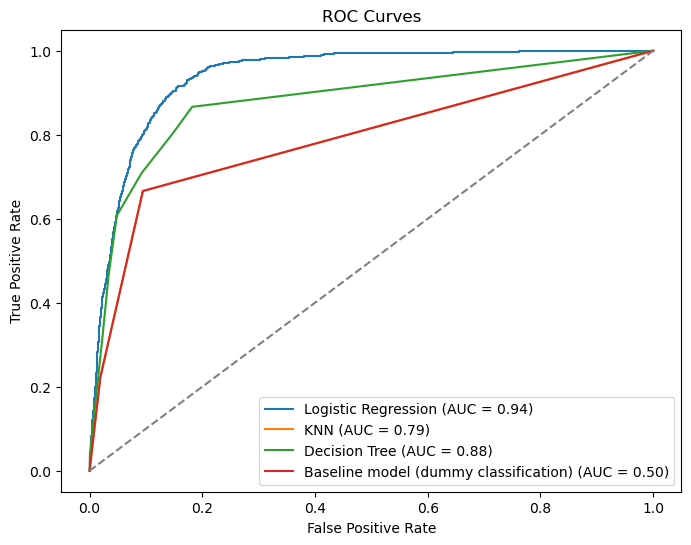

In [149]:
# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, logistic.predict_proba(X_test)[:, 1]):.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]):.2f})')
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'Decision Tree (AUC = {roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1]):.2f})')
#plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]):.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'Baseline model (dummy classification) (AUC = {roc_auc_score(y_test, dm_clf.predict_proba(X_test)[:, 1]):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
    
####  <span style="color: blue; ">  **Point 1 : Logistic regression has maximum AUC** </span>

####  <span style="color: blue; ">  **Point 2: Logistic regression is above of KNN and dections tree** </span>

####  <span style="color: blue; ">  **Point 3:  Logistic regression is best model** </span>
</div>

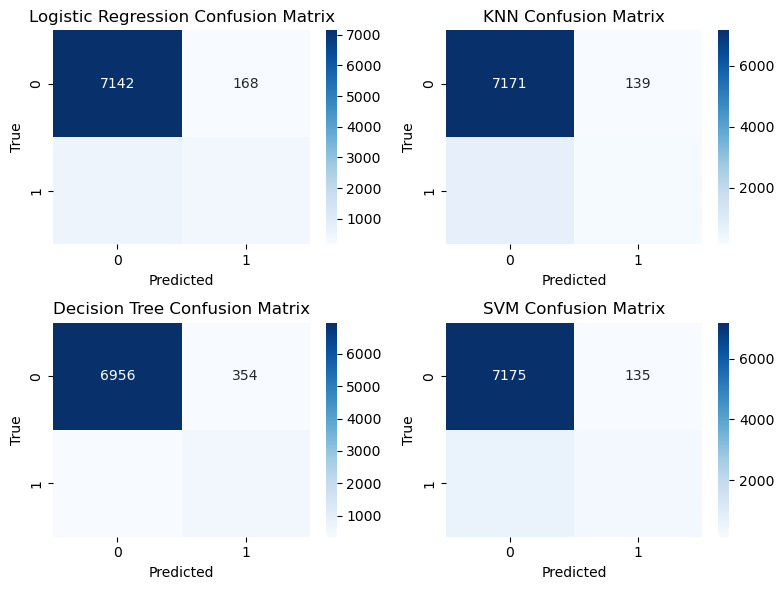

In [152]:
# Confusion Matrix plotting
logistic_cm = confusion_matrix(y_test, logistic_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
decision_tree_cm = confusion_matrix(y_test, decision_tree_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

# Plot Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Logistic Regression Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('True')

sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('KNN Confusion Matrix')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('True')

sns.heatmap(decision_tree_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Decision Tree Confusion Matrix')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('True')

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('SVM Confusion Matrix')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('True')

plt.tight_layout()
plt.show()


### <span style="color: red; ">  **11- 5-4- Best model?** </span> 

<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
    
####  <span style="color: blue; ">  **Point 1- using gridseach we find best paramters for each model. It means, we find best model of each calssifier** </span>
####  <span style="color: blue; ">  **Point 2- among them we chose logisitc regression, then we can say tuned logistic regression with gridsearch is the best of the bests.** </span>
###  <span style="color: green; ">  **Point 3- Best model is Logistic Regression** </span>
</div>

### <span style="color: red; ">  **11- 6- Feature Importance with best model** </span> 

In [155]:
# we now logistic regression is the final model 
#let see with this model what is the relative importance of each feature 

In [156]:
importance = logistic.named_steps['classifier'].coef_[0]
Feature=logistic.named_steps['preprocessor'].get_feature_names_out()
feature_importance = pd.DataFrame({ 'Importance': importance, 'Feature': Feature})
feature_importance= feature_importance.sort_values('Importance', ascending=False)

<Axes: title={'center': 'Feature Importance for Logistic Regression as Best Model'}>

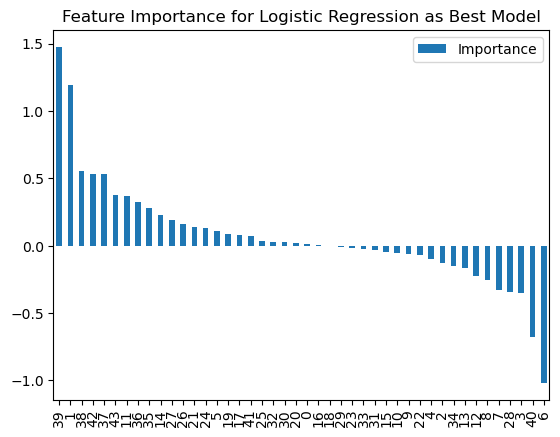

In [161]:
# Plot the feature importance
feature_importance.plot(kind='bar', title='Feature Importance for Logistic Regression as Best Model')

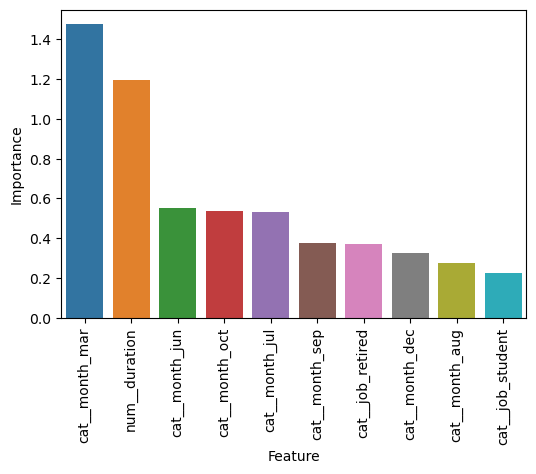

In [157]:
# Plot the feature importance of ten positive 
feature_importance1= feature_importance.head(10)

# Set figure size
plt.figure(figsize=(6, 4)) 
# (width, height) in inches
sns.barplot(x= feature_importance1['Feature'], y= feature_importance1['Importance'])
plt.xticks(rotation=90)

# Show plot
plt.show()


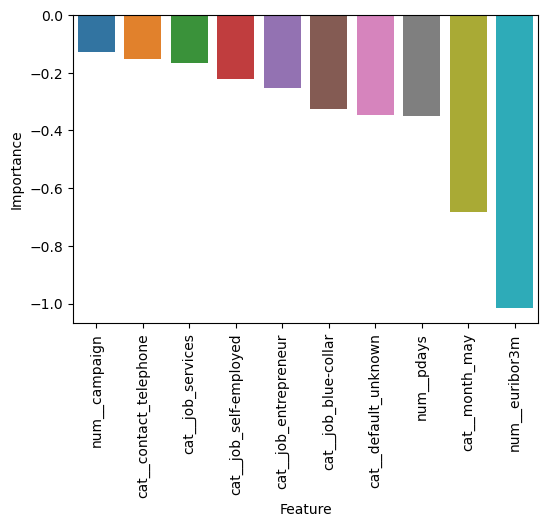

In [158]:
# Plot the feature importance of ten negative 
feature_importance2= feature_importance.tail(10)

# Set figure size
plt.figure(figsize=(6, 4)) 
# (width, height) in inches

# Plot with seaborn

sns.barplot(x= feature_importance2['Feature'], y= feature_importance2['Importance'])
plt.xticks(rotation=90)


# Show plot
plt.show()

In [162]:
feature_importance

,Importance,Feature
39,1.476162,cat__month_mar
1,1.195876,num__duration
38,0.553261,cat__month_jun
42,0.534342,cat__month_oct
37,0.529770,cat__month_jul
43,0.376571,cat__month_sep
11,0.367900,cat__job_retired
36,0.324017,cat__month_dec
35,0.275857,cat__month_aug
14,0.224760,cat__job_student


<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 

####  <span style="color: red; ">  **Main results about featur importance:** </span>

####   <span style="color: red; "> **1- Duration:** </span> <span style="color: blue; "> 
it is the most improtant factor affecting positively the result of direct marketing. Times goes up, success probability goes up too.  </span>

####   <span style="color: red; "> **2- Interest rate** </span> <span style="color: blue; "> 
Interest rate is opportunity cost of money. Higher interest rate if bank pay for people they will deposit more. </span>

####   <span style="color: red; "> **3- Month** </span> <span style="color: blue; ">
End of each season has the highest level of success. March and June have the highest rate of success among month. on the other hand, the last maonth of year campaign are off. </span>

####   <span style="color: red; "> **4- Job** </span> <span style="color: blue; ">
Highest rate of success comes back to retired, followd by sutdnents and unemployed. retired can get more money from deposite as they are risk averse in comparison to people how are working. Illiterate people alos accept better the suggestion of campagin, maybe their information is low and they do not check the alternatives. Blue-collar, entreprenuer, self-employed, servcies, management and technician have negative effect on the rate of success, respectively.   </span>

####   <span style="color: red; "> **5- Marital satatus** </span> <span style="color: blue; ">
It is not important.  </span>

####   <span style="color: red; "> **6- loan satatus** </span> <span style="color: blue; ">
having loan is not important.  </span> 

####   <span style="color: red; "> **7- previous contant satatus** </span> <span style="color: blue; ">
It has negative effect on success, maybe they are more familiar with the strategy of contact. </span>

####   <span style="color: red; "> **8- Pdays contant satatus** </span> <span style="color: blue; ">
It has negative effect on success. it shows that if you as a memebr of campaingn starts a calling one person, try to reach the result and do not postpone it for long days.  </span>

####   <span style="color: red; "> **9- Housing loan** </span> <span style="color: blue; ">
It has negative effect, but its coefficient is low. It shows that who has hosing loan maybe does not have extra money to deposite in the bank.   </span>

####   <span style="color: red; "> **10- age** </span> <span style="color: blue; ">
It has positive effect, but its coefficient is low.</span>

####   <span style="color: red; "> **11- contact** </span> <span style="color: blue; ">
telephone has negative effect, cellular is better.</span>

####   <span style="color: red; "> **12- campaign** </span> <span style="color: blue; ">
if the number of calling increase, the level of success will decrease. we should complete this information with our data analysis in problem thee. There we represted that after three call, it is completly true.</span>

####   <span style="color: red; "> **13- confidence** </span> <span style="color: blue; ">
it has positive effect, which shows when people are hopeful to the future they are more eager to accept the suggestion of the campaign .</span>

####   <span style="color: red; "> **14- Education** </span> <span style="color: blue; ">
university, basic6y, illiterate, and professional has positive effect, and high school and basic 9y have negative effect.   </span>

</div>

# <span style="color: red; ">  **Conclusion** </span> 

 ### <span style="color: red; "> **1- Steps of the project (what we have done?)** </span>

<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
  
#### 1- <span style="color: red; "> **Data udnerstanding** </span>
    Data udnerstanding : In around 41k datatest (20 feature and 1 target),
    Target variable represents the success of campaign with ("yes" or "no"). we have we have 10 categorical and 10 numerical features.
#### 2- <span style="color: red; "> **Business udnerstanding** </span> 
    Purpose of this project is to evaluate the marketing strategy 
    applied by 17 campaigns in Portugal from 2008 to 2010. 
#### 3- <span style="color: red; "> **Methodology** </span>
    Classification. Target variable is imbalance (81% yes, 19% no), 
    then we have imbalance dataset and in test/split should care about it. 
#### 4- <span style="color: red; "> **Visualizatio and EDA** </span>
    At first we visualize all features (numerical and categorical)
    and understand their relationship with each other and with target variable. 
    In first step, we found that some numerical variables have high correlation, and then remove one them. 
#### 5- <span style="color: red; "> **Baseline and simple models:** </span>
    We define dummy classifier as baseline model, then add logistic regression as baseline model 
    and see that accuracy of the model increased for both test and train datasets
#### 6- <span style="color: red; "> **Performance evaluation of clasiffiers with default parameters:** </span> 
    We add decision tree, svm and knn classifier with default and check their performance. 
    we use not only test and train score, but also recall, precision, f1, classification report and confusion matrix. 
#### 7- <span style="color: red; "> **Finding best model with default parameters:** </span>
    With default value of parameters, we find that SVM is the best model.
#### 8- <span style="color: red; "> **Accurate Feature engineering and EDA: multiple correlation analysis** </span> 
    Again we check the data and with better EDA and feature engineering. 
    we find that two numerical features have high correlation and elements of two categorical features have approximately same distribution.
    then we remove four feature. totally, we remove 5 features and start the next step.
#### 9- <span style="color: red; "> **Using Grid Search to find best parameters for each classifer:** </span>
    We define different parameters for our classifiers
    and using gridseach we find the best parameters for each classifier. 
#### 10- <span style="color: red; "> **Performance evaluation of clasiffiers with best parameters:** </span> 
    Again fit model with this classifiers with their best parameters and in last step of modeling try to evaluate their performance.
#### 11- <span style="color: red; "> **Finding best model among different calissifers with best parameters:** </span> 
    Using confusion matrix, ROC curve, recall, precision and f1
    we find that among four models with best parameters, logistic regression is the best. 
#### 12- <span style="color: red; "> **Featuer Importance with best model:** </span>  
    We extract feature importance and analyze them. 
#### 13- <span style="color: red; "> **Cross check of feature improtance with EDA and feature engineering** </span>  
    Our finding are completely compatible with what we find in feature engineering and data visualization parts. 
#### 14-  <span style="color: red; "> **Clear suggestions with attention to business undestanding** </span>  
    feature importance and data visualization and feature engineering, 
    we give some suggestions to improve the performance of campaign strategy.


In [3]:
# we have done all of the process from one to 13 in problem 1 to problem 11, and here is the deployment  

 ### <span style="color: red; "> **2- Deployment** </span>
Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that my audience are companies and campaigns interested in fine-tuning their strategy of marketing. 

### <span style="color: red;"> My Idea for used campaing marketingare two parts:  </span>
##### First Part: List of factors affecting the rate of success of marketig strategy
##### Second Part:  How factor affecting the rate of success:
##### Third Part: Suggestions (for audiece to improve efficiency and achive business objectives)

### <span style="color: red;"> 2-1- List of factors affecting the success rate of campaign marketing strategy: </span>

#####     <span style="color: red; ">  Bank client factors: </span> age, job, education, housing, loan 
#### <span style="color: red; ">  Factors related with the last contact:</span>  conatact, month, duration, 
#### <span style="color: red; ">  Other attributes: </span>  campaign, pdays, previous
#### <span style="color: red; ">  Social and economic context attributes</span>  conf, euribor3m


### <span style="color: red;"> 2-2-  How factors affecting the rate of success: </span>

###   <span style="color: red; ">  A- Bank client factors: </span> 
###   <span style="color: blue; "> 1-Age: </span> 
####  <span style="color: red; ">  Positive effect: </span> It has positive effect, but its coefficient is low. 
####  <span style="color: red; ">  Analysis: </span>
#### 1. Campaigns cover all groups, but maximum contact was for 30-50 years, then 20-30 and 50-60 and finally more than 60.
#### 2. It seems population has normal distribution 

###   <span style="color: blue; "> 2-job: </span> 
####  <span style="color: red; ">  Positive effect: </span> Retired has maximum effect, followed by student, and unemployed,  
####  <span style="color: red; ">  Negative effect: </span> blue-collar has negative effect, followed by entrepreneur, self-employed, services, management, and technician, respectively

####  <span style="color: red; ">  Analysis: </span>

#### 1. Job acts as proxy for income.
#### 2.  In general, retired, student and unemployed can be categorizes as low income. then we can say people with low income have high rate of success. 
#### 3. In general, blue collar, entrepreneur, services, management, and self-employed are higher income. 
#### 4. Moreover entrepreneur and managers are risk lovers. Then we can see that high income and risk lover have low rate of success. 

###   <span style="color: blue; "> 3- Maritual: </span> 
####  <span style="color: red; ">  Analysis: </span> It is not important factor to affect rate of success.  

###  <span style="color: blue; ">  4- Education: </span>
####  <span style="color: red; ">  Positive effect: </span> University, basic6y, illiterate, and professional have positive effect
####  <span style="color: red; ">  Negative effect: </span> High school and basic 9y have negative effect.
####  <span style="color: red; ">  Analysis: </span> 
#### 1.people with low education or high education have high rate of success 
#### 2. people with middle education have low rage of success 

###  <span style="color: blue; ">  5- Housing: </span>
####  <span style="color: red; ">  Negative effect: </span> it has negative effect, but its coefficient is low. 
####  <span style="color: red; ">  Analysis: </span>  
#### It shows that who has hosing loan maybe does not have extra money to deposit in the bank.   </span>

###  <span style="color: blue; ">  6- Loan: </span>
####  <span style="color: red; ">  Negative effect: </span>It has negative effect but its coefficient is low. 

####  <span style="color: red; ">  Analysis: </span>  
#### people who have loan, maybe does not have extra maybe does not have extra money to accept the suggestion.
###
### <span style="color: red; ">  B- Factors related with the last contact:</span>
###  <span style="color: blue; "> 7- Contact: </span>
####  <span style="color: red; ">  Negative effect: </span> Telephone has negative effect, cellular is better.

###  <span style="color: blue; ">  8- Month: </span>
####  <span style="color: red; ">  Positive effect: </span> Mar. (coef > 1), oct, jun, ju, sep (<0.5 coeff< 1), dec, aug (0.5 < coeff < 0.1), nov ( 0.1< coff < 0)
####  <span style="color: red; ">  Negative effect: </span> May (-1< coef < -0.5)
####  <span style="color: red; ">  Analysis: </span>  
#### 1. Spring: Only march, it has also the maximum effect among all 12 months
#### 2. Summer: Jun has the highest rate. May has negative effect. 
#### 3. Autumn: Sep has the highest rate.
#### 4. Winter: Oct has the highest rate. 
#### 5. end of each season is the best time for marketing 

###  <span style="color: blue; ">  9- Duration: </span>
####  <span style="color: red; ">  Positive effect: </span> It is the most important numerical factor affect positively 
####  <span style="color: red; ">  Analysis: </span>   
#### 1. best time for duration of calling one person : 3-5 minutes  
#### 2. duration > 800 (secod): the probability of success decreases sharply. it shows when time of speaking reaches to more than 15 minutes, its only wasting time 
#### 3. as time of duration goes up, success rate goes up directly, which shows if campaign wants to be success should talk and talk with more time. 
#### 4. Break point: campaign should increase the time of calling, but take care does not go beyond breakpoint ( 15 minutes). 

###
### <span style="color: red; ">  C- Other attributes: </span> 

###  <span style="color: blue; ">  10- Campaign: </span>
####  <span style="color: red; ">  Negative effect: </span> If the number of calling increase, the level of success will decrease. 
####  <span style="color: red; ">  Analysis: </span>   
#### In EDA, we found that the average number of contact is 2.56., 

###  <span style="color: blue; ">  11- pdays: </span>
####  <span style="color: red; ">  Negative effect: </span> It has negative effect on success. 
####  <span style="color: red; ">  Analysis: </span>   
#### It shows that if you as a member of campaign start to call a person, try to reach the result and do not postpone it for long days. 

###  <span style="color: blue; ">  12- previous: </span> 
####  <span style="color: red; ">  Negative effect: </span> It has negative effect on success. 
####  <span style="color: red; ">  Analysis: 
#### </span> when the number of "previous" increase, maybe it shows people are more familiar with the strategy of company, have more knowledge from previous contact and then the success rate  will be low. 

### 
### <span style="color: red; ">  D- Social and economic context attributes: </span>

###  <span style="color: blue; ">  13- Confidence level: </span> 
####  <span style="color: red; ">  Positive effect: </span>It has positive effect on success rate.
####  <span style="color: red; ">  Analysis: </span>   
#### Which shows when people are hopeful to the future they are more eager to accept the suggestion of the campaign. 

###  <span style="color: blue; ">  14- interest rat: </span> 
####  <span style="color: red; ">  Negative effect: </span> It has negative effect. 
####  <span style="color: red; ">  Analysis: </span>   
#### 1. it seems odd at first, why when interest rate goes up, the success rate goes down? at first clue, maybe someone expect positive effect. 
#### 2. interest rate is defined automatically and it not suggested by the campaign, it is exogenous macroeconomic index for both people and campaigns.
#### 3. information from EDA: interest rate has positive correlation with number of employment. when unemployment is high it means economy is in recession. 
#### 4. when economy is in recession, people do not have extra money to deposit or are not sure about the future.
#### 5. on the period of campaign, 2008-2010, the world was in recession, higher interest rate means central banks are trying to control the economy
#### and it send signal to society that economy has not good condition, and even they think maybe banks will be bankrupt and they lose their money. 
#### 6. macroeconomic stability is important and it happens in low interest rates and high confidence level, as we analyses it.


<div style="background-color: LightPink; padding: 10px; border-radius: 5px;"> 
    
# <span style="color: red; "> 2-3- Suggestions   </span>
###   <span style="color: red; ">  A- Bank client factors: </span> 
###   <span style="color: blue; "> 1-Age: </span>
#### It is not important factor. Do not pay attention to that. 

###   <span style="color: blue; "> 2-job: </span> 
#### 1. Focus on these groups: Retired student, and unemployed,  
#### 2. Risk lovers have low success rate, try do not waste your time with them. I mean these groups: blue-collar, entrepreneur, self-employed, services, management, and technician, respectively

###   <span style="color: blue; "> 3- Maritual: </span> 
#### It is not important factor. Do not pay attention to that. 

###  <span style="color: blue; ">  4- Education: </span>
#### 1. Devid people in three groups: low, middle and high education.
#### 2. Focus on people with low education or high education, they have high rate of success 
#### 3. People with middle education have low rage of success, do not focus on them. 

###  <span style="color: blue; ">  5- Housing: </span> 
#### It has little negative effect, but generally it is not important.  

###  <span style="color: blue; ">  6- Loan: </span>
#### It has little negative effect, but generally it is not important.  


###
### <span style="color: red; ">  B- Factors related with the last contact:</span>
###  <span style="color: blue; "> 7- Contact: </span>
####  Call people with cellular, try do not call them with telephone. 

###  <span style="color: blue; ">  8- Month: </span>
#### 1. Last month of each season is vital, focus on them. 
#### 2. Never loose March. 
#### 3. First and last months of the year you can go vacations. 

###  <span style="color: blue; ">  9- Duration: </span>
####  1. It is the most important numerical factor. Focus on it.  
#### 2. Golden duration of a call is 3-5 minutes. try talk to people at least 3 minues. 
#### 3. If your call time reaches to 15 minutes, try to finish it. 

###
### <span style="color: red; ">  C- Other attributes: </span> 

###  <span style="color: blue; ">  10- Campaign: </span>
#### 1. The average number of contact is around 2.5, then 2 or 3 times calling is good. 
#### 2. Keep in mind that as the number of calling goes up (more than 3 time), the level of success goes down. 

###  <span style="color: blue; ">  11- pdays: </span>
#### If you, as a member of marketing campaign, start to call a person, try to reach the result and do not postpone it for long days. 

###  <span style="color: blue; ">  12- previous: </span> 
#### </span> It decrease the chance of success, if you found that they have previous call for several time, it means your task is hard and should try harder or finish it soon. 

### 
### <span style="color: red; ">  D- Social and economic context attributes: </span>


###  <span style="color: blue; ">  13- interest rat: </span> 
####  Try to increase marketing in lower interest rate. It is also indices for macroeconomic expectations.  

###  <span style="color: blue; ">  14- Confidence level: </span> 
#### Try to increase marketing in higher confidential levels of society. 
 

<div>